In [1]:
from Hedging import hedge
import numpy as np
import matplotlib.pyplot as plt
import random

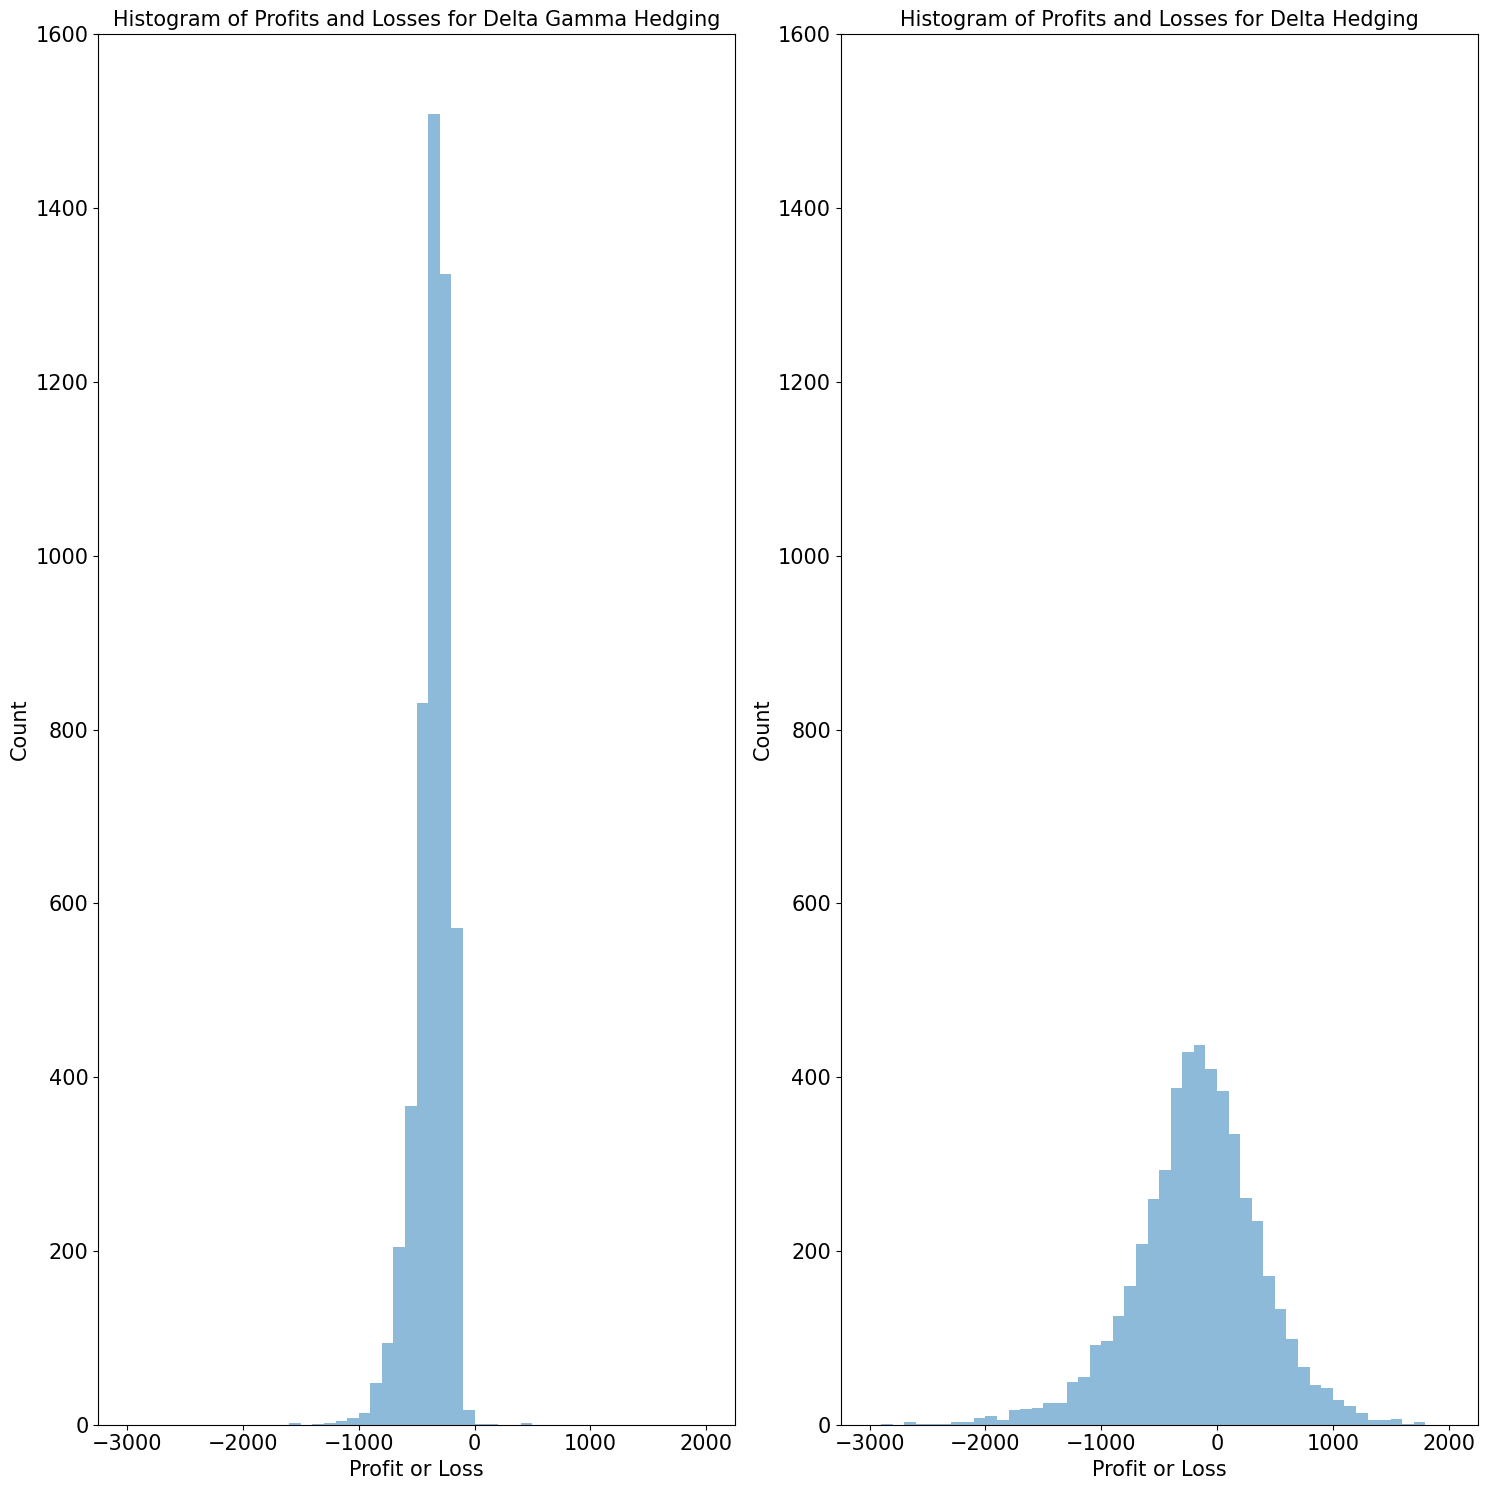

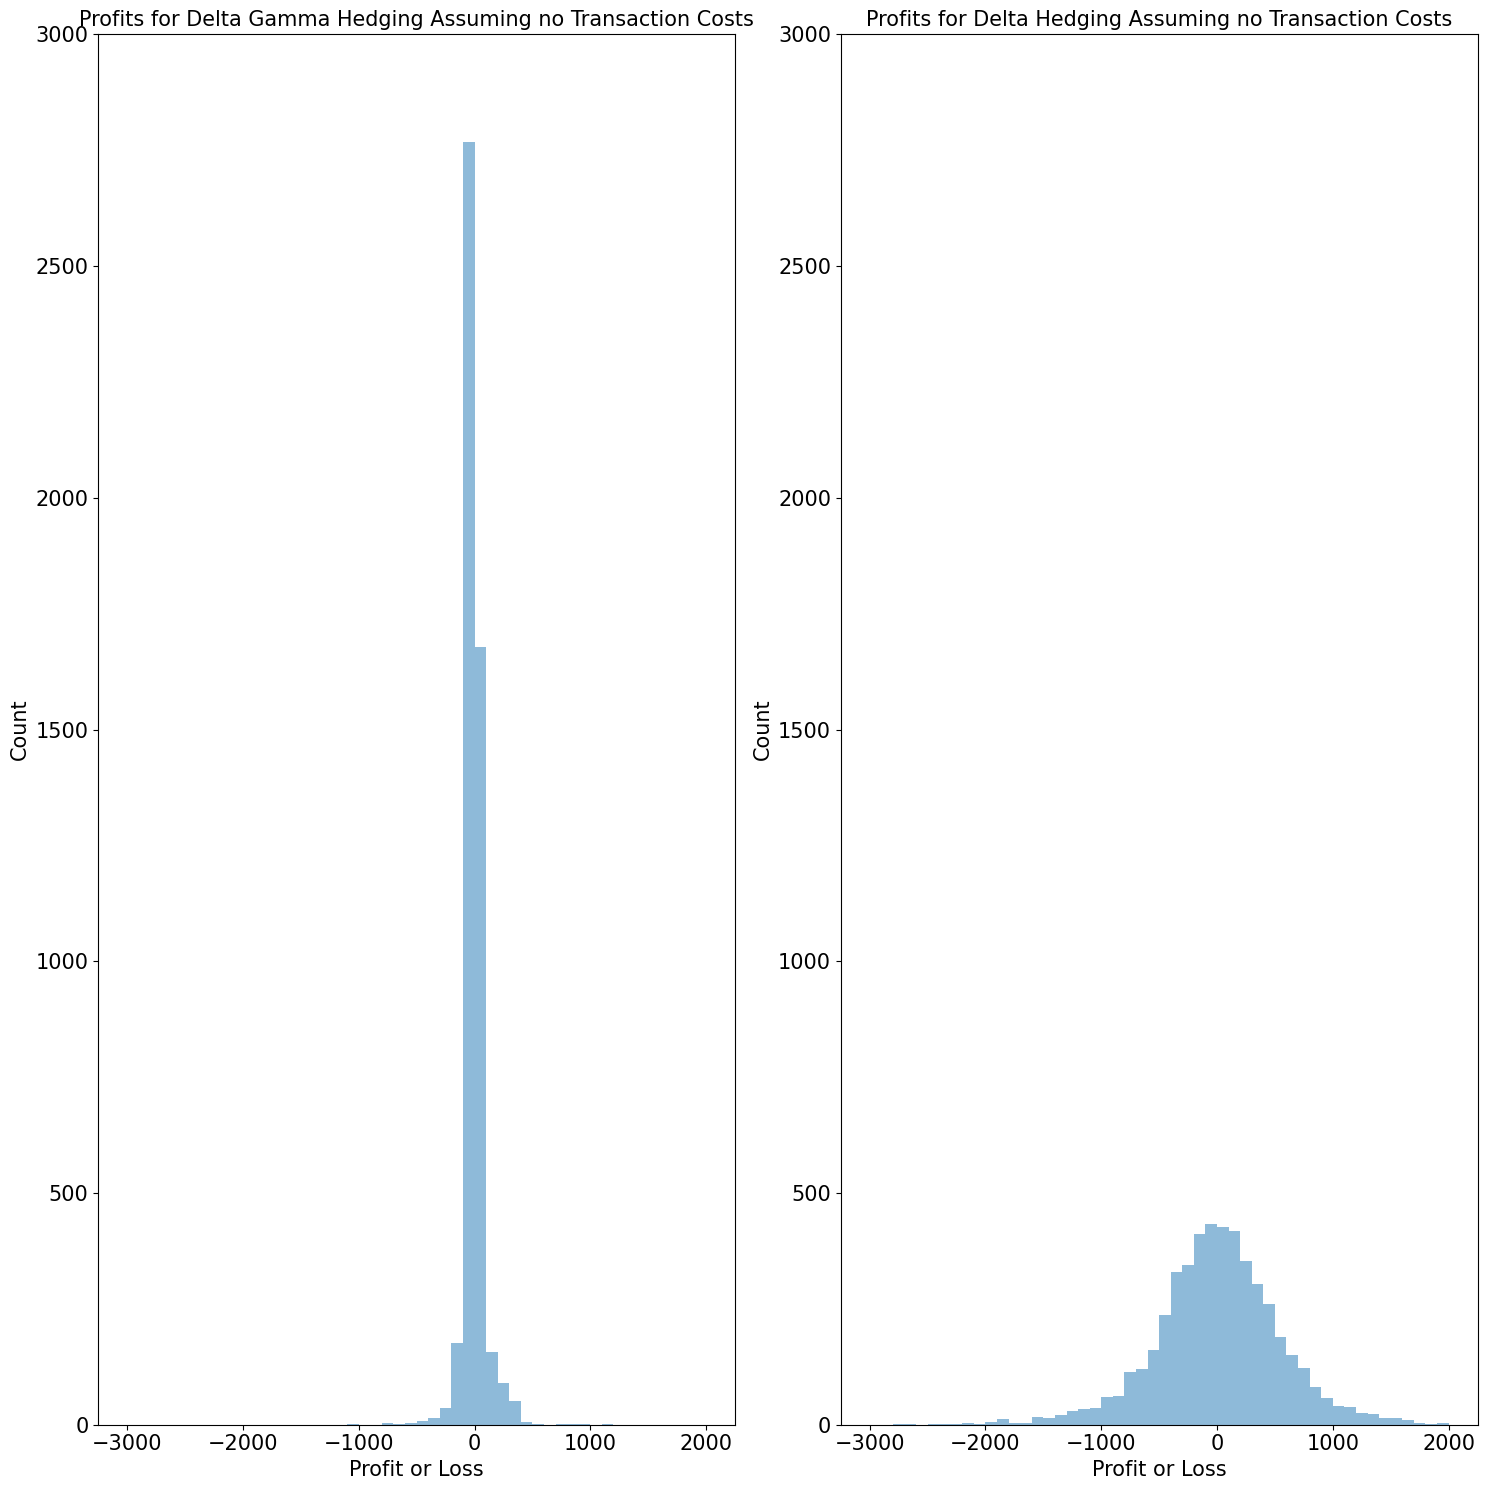

In [2]:
#Delta Hedge

np.random.seed(250)

model = hedge(Tg=0.25, sigma=0.25, Ndt=63, sigma_real=0.25, r=0.05, mu=0.1)
    
t, S, M, alpha = model.simulate_delta_hedge(batch_size=5_000, units=10000)
PnL = M[:,-1]

#plt.hist(PnL,bins=np.linspace(-3000,2000,51), alpha = 0.5)
#plt.show()

#Delta Gamma Hedge

np.random.seed(250)

model_2 = hedge(Tg=0.25, sigma=0.25, Ndt=63, Th=0.3, sigma_real=0.25, r=0.05, mu=0.1)
   
t_2, S_2, M_2, alpha_2, gamma_2, opt_h_2, delta_g_2, delta_h_2 = model_2.simulate_gamma_hedge(batch_size=5_000, units=10000)
PnL_2 = M_2[:,-1]

#Code to Generate Figure 1 in Report

plt.figure(figsize=(15, 15))

plt.subplot(1,2,1)
plt.hist(PnL_2, bins=np.linspace(-3000,2000,51), alpha = 0.5)
plt.title("Histogram of Profits and Losses for Delta Gamma Hedging", fontsize=15)
plt.xlabel("Profit or Loss", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)
plt.ylim(0, 1600)

#print('Standard Deviation for delta-gamma for 0.25 volatility: ', np.var(PnL_2) ** 0.5)
#print('Mean for delta-gamma for 0.25 volatility: ', np.mean(PnL_2))

plt.subplot(1,2,2)
plt.hist(PnL,bins=np.linspace(-3000,2000,51), alpha = 0.5)
plt.title("Histogram of Profits and Losses for Delta Hedging", fontsize=15)
plt.xlabel("Profit or Loss", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)
plt.ylim(0, 1600)

plt.tight_layout()
plt.show()

#print('Standard Deviation for delta for 0.25 volatility: ', np.var(PnL) ** 0.5)
#print('Mean for delta for 0.25 volatility: ', np.mean(PnL))

#Exploring the Effect of Transaction Costs

model_no_cost = hedge(Tg=0.25, sigma=0.25, Ndt=63, Th=0.3, sigma_real=0.25, r=0.05, mu=0.1, k=0)
   
t_nc, S_nc, M_nc, alpha_nc, gamma_nc, opt_h_nc, delta_g_nc, delta_h_nc = \
    model_no_cost.simulate_gamma_hedge(batch_size=5_000, units=10000)
t_nc2, S_nc2, M_nc2, alpha_nc2 = model_no_cost.simulate_delta_hedge(batch_size=5_000, units=10000)
PnL_nc = M_nc[:,-1]
PnL_nc2 = M_nc2[:,-1]

#Code to Generate Figure 2 in Report

plt.figure(figsize=(15, 15))

plt.subplot(1,2,1)
plt.hist(PnL_nc, bins=np.linspace(-3000,2000,51), alpha = 0.5)
plt.title("Profits for Delta Gamma Hedging Assuming no Transaction Costs", fontsize=15)
plt.xlabel("Profit or Loss", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)
plt.ylim(0, 3000)

#print('Standard Deviation for delta-gamma for 0.25 volatility assuming k=0: ', np.var(PnL_nc) ** 0.5)
#print('Mean for delta-gamma for 0.25 volatility assuming k=0: ', np.mean(PnL_nc))

plt.subplot(1,2,2)
plt.hist(PnL_nc2,bins=np.linspace(-3000,2000,51), alpha = 0.5)
plt.title("Profits for Delta Hedging Assuming no Transaction Costs", fontsize=15)
plt.xlabel("Profit or Loss", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)
plt.ylim(0, 3000)

plt.tight_layout()
plt.show()

#print('Standard Deviation for delta for 0.25 volatility assuming k=0: ', np.var(PnL_nc2) ** 0.5)
#print('Mean for delta for 0.25 volatility assuming k=0: ', np.mean(PnL_nc2))


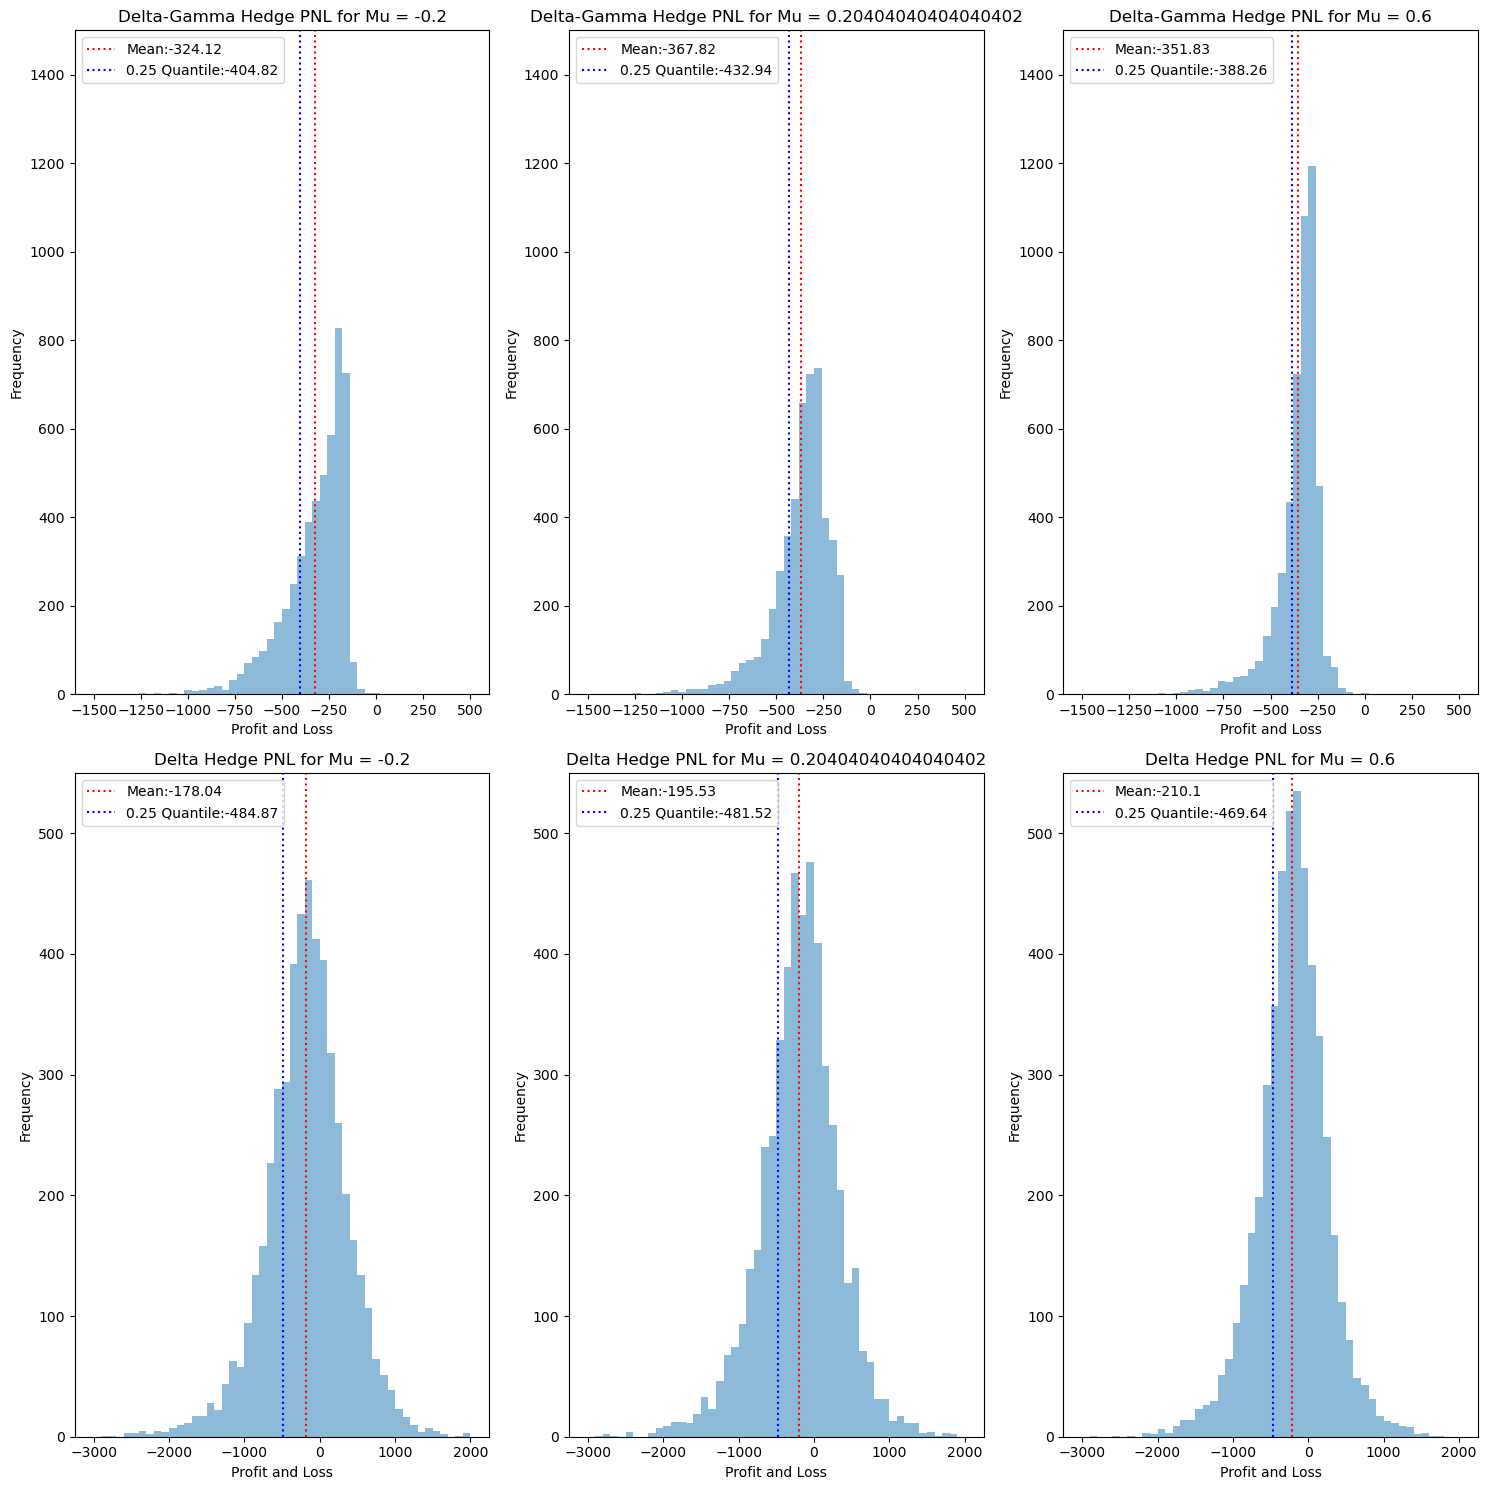

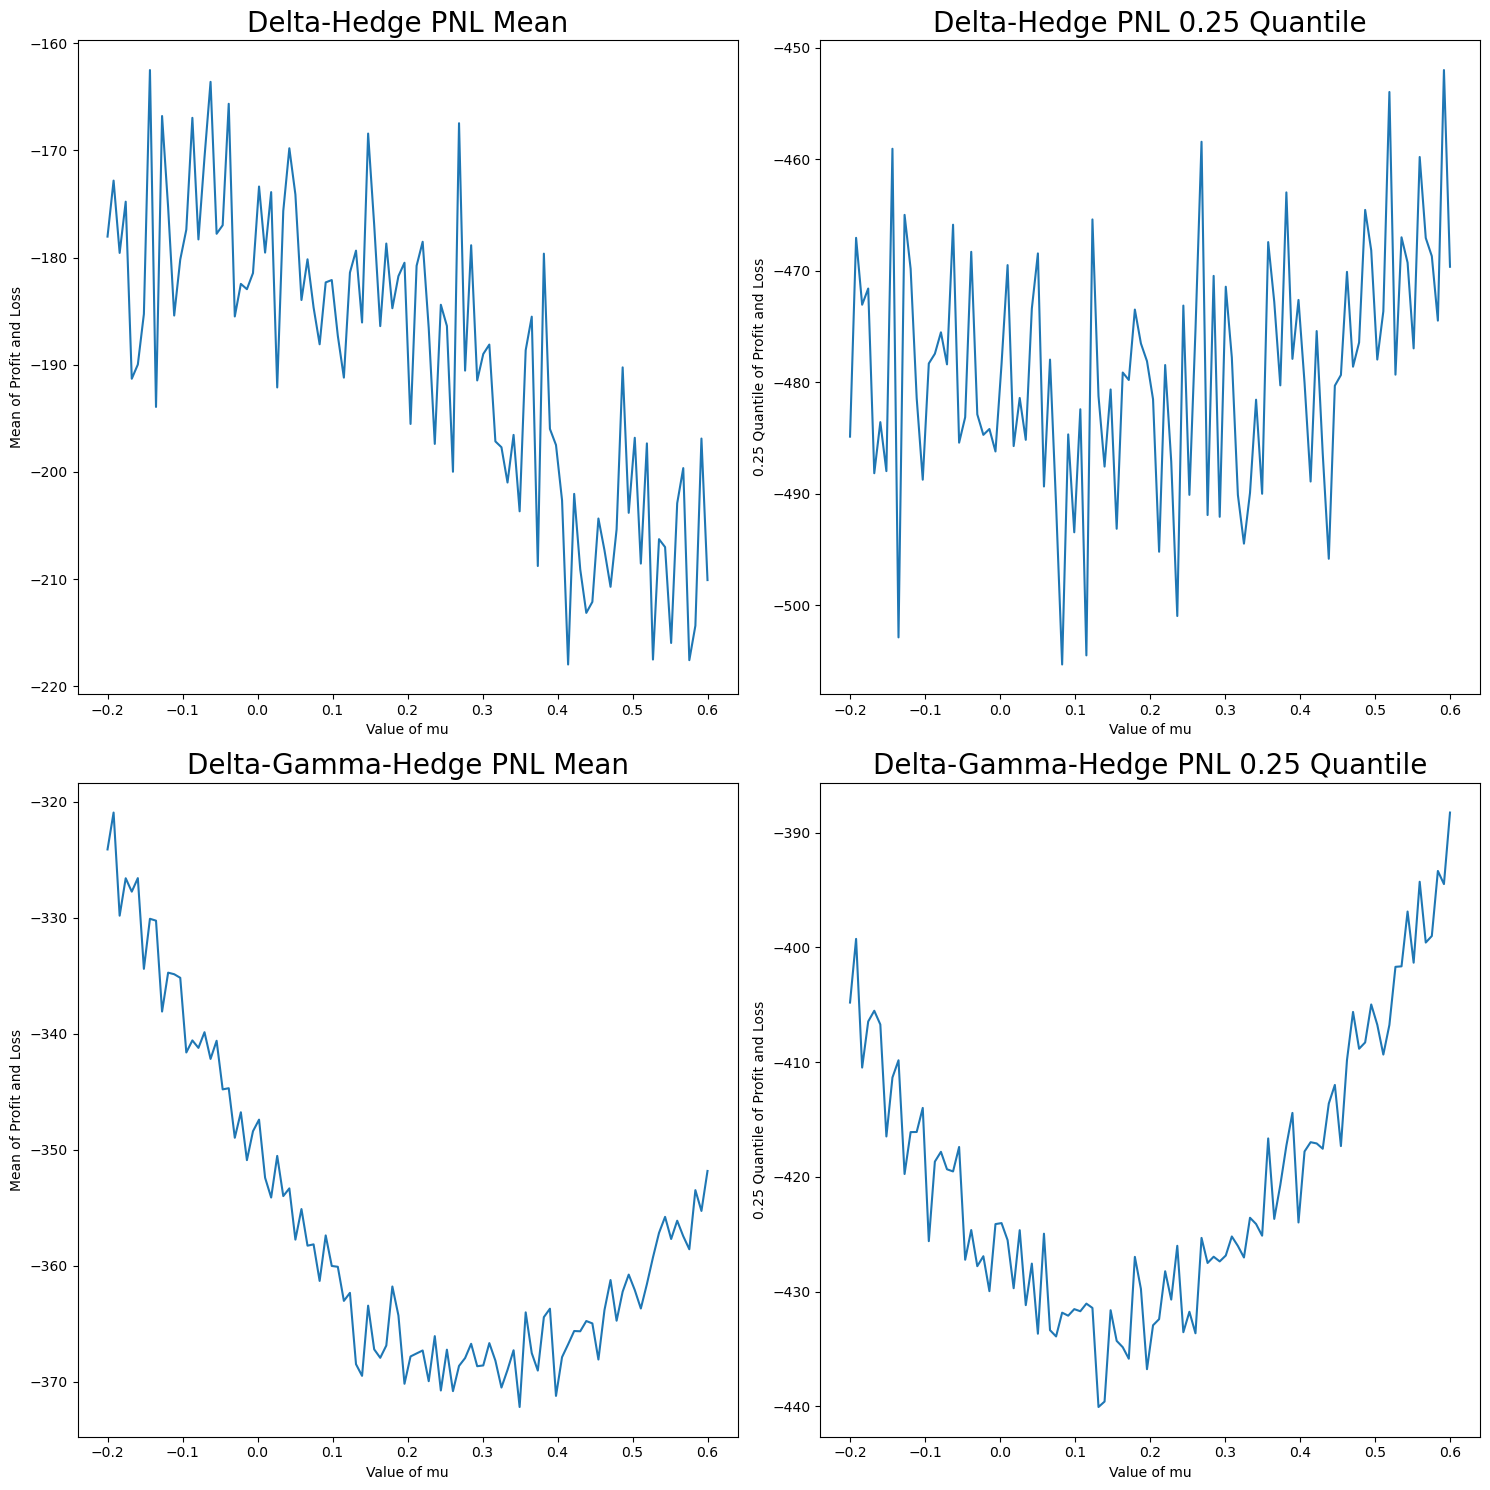

In [3]:
#Effect of Mu

np.random.seed(250)

mus = np.linspace(-0.20, 0.60, 100)
delta_mean = []
delta_q = []
gamma_mean = []
gamma_q = []

mus_to_plot = [0, 50, len(mus)-1]
pnl_plot_delta = []
pnl_plot_gamma = []

for i in range(len(mus)):
    
    mod = hedge(Tg=0.25, sigma=0.25, Ndt=63, Th=0.3, sigma_real=0.25, r=0.05, mu=mus[i])
    t_i, S_i, M_i, alpha_i, gamma_i, opt_h_i, delta_g_i, delta_h_i = mod.simulate_gamma_hedge(batch_size=5_000, units=10000)
    t_j, S_j, M_j, alpha_j = mod.simulate_delta_hedge(batch_size=5_000, units=10000)
    PnL_i = M_i[:,-1]
    PnL_j = M_j[:,-1]
    
    delta_mean.append(PnL_j.mean())
    delta_q.append(np.quantile(PnL_j, 0.25))
    
    gamma_mean.append(PnL_i.mean())
    gamma_q.append(np.quantile(PnL_i, 0.25))
    
    #Save a few plots to print
    
    if i in mus_to_plot:
        pnl_plot_delta.append(PnL_j)
        pnl_plot_gamma.append(PnL_i)
           
fig, ax = plt.subplots(2,3,figsize=(15, 15))

for i in range(len(mus_to_plot)):

        ax[0,i].hist(pnl_plot_gamma[i], bins=np.linspace(-1500,500,51), alpha = 0.5)
        ax[0,i].set_title('Delta-Gamma Hedge PNL for Mu = ' + str(mus[mus_to_plot[i]]))
        ax[0,i].set_xlabel('Profit and Loss')
        ax[0,i].set_ylabel('Frequency')
        ax[0,i].set_ylim(0,1500)
        ax[0,i].axvline(gamma_mean[mus_to_plot[i]], linestyle=":", color="red", label='Mean:' + \
                        str(np.round(gamma_mean[mus_to_plot[i]], 2)))
        ax[0,i].axvline(np.quantile(pnl_plot_gamma[i], 0.25), linestyle=":", color="blue", label='0.25 Quantile:'+ \
                        str(np.round(np.quantile(pnl_plot_gamma[i], 0.25),2)))
        ax[0,i].legend()
        ax[1,i].hist(pnl_plot_delta[i],bins=np.linspace(-3000,2000,51), alpha = 0.5)
        ax[1,i].set_title('Delta Hedge PNL for Mu = ' + str(mus[mus_to_plot[i]]))
        ax[1,i].set_xlabel('Profit and Loss')
        ax[1,i].set_ylabel('Frequency')
        ax[1,i].set_ylim(0,550)
        ax[1,i].axvline(delta_mean[mus_to_plot[i]], linestyle=":", color="red", label='Mean:' + \
                        str(np.round(delta_mean[mus_to_plot[i]], 2)))
        ax[1,i].axvline(np.quantile(pnl_plot_delta[i], 0.25), linestyle=":", color="blue", label='0.25 Quantile:'+ \
                        str(np.round(np.quantile(pnl_plot_delta[i], 0.25),2)))
        ax[1,i].legend()
        
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(2,2,figsize=(15, 15))

ax[0,0].plot(mus, delta_mean)
ax[0,0].set_title('Delta-Hedge PNL Mean', fontsize = 20)
ax[0,0].set_xlabel('Value of mu')
ax[0,0].set_ylabel('Mean of Profit and Loss')

ax[1,0].plot(mus, gamma_mean)
ax[1,0].set_title('Delta-Gamma-Hedge PNL Mean', fontsize = 20)
ax[1,0].set_xlabel('Value of mu')
ax[1,0].set_ylabel('Mean of Profit and Loss')

ax[0,1].plot(mus, delta_q)
ax[0,1].set_title('Delta-Hedge PNL 0.25 Quantile', fontsize = 20)
ax[0,1].set_xlabel('Value of mu')
ax[0,1].set_ylabel('0.25 Quantile of Profit and Loss')

ax[1,1].plot(mus, gamma_q)
ax[1,1].set_title('Delta-Gamma-Hedge PNL 0.25 Quantile', fontsize = 20)
ax[1,1].set_xlabel('Value of mu')
ax[1,1].set_ylabel('0.25 Quantile of Profit and Loss')

plt.tight_layout()
plt.show()

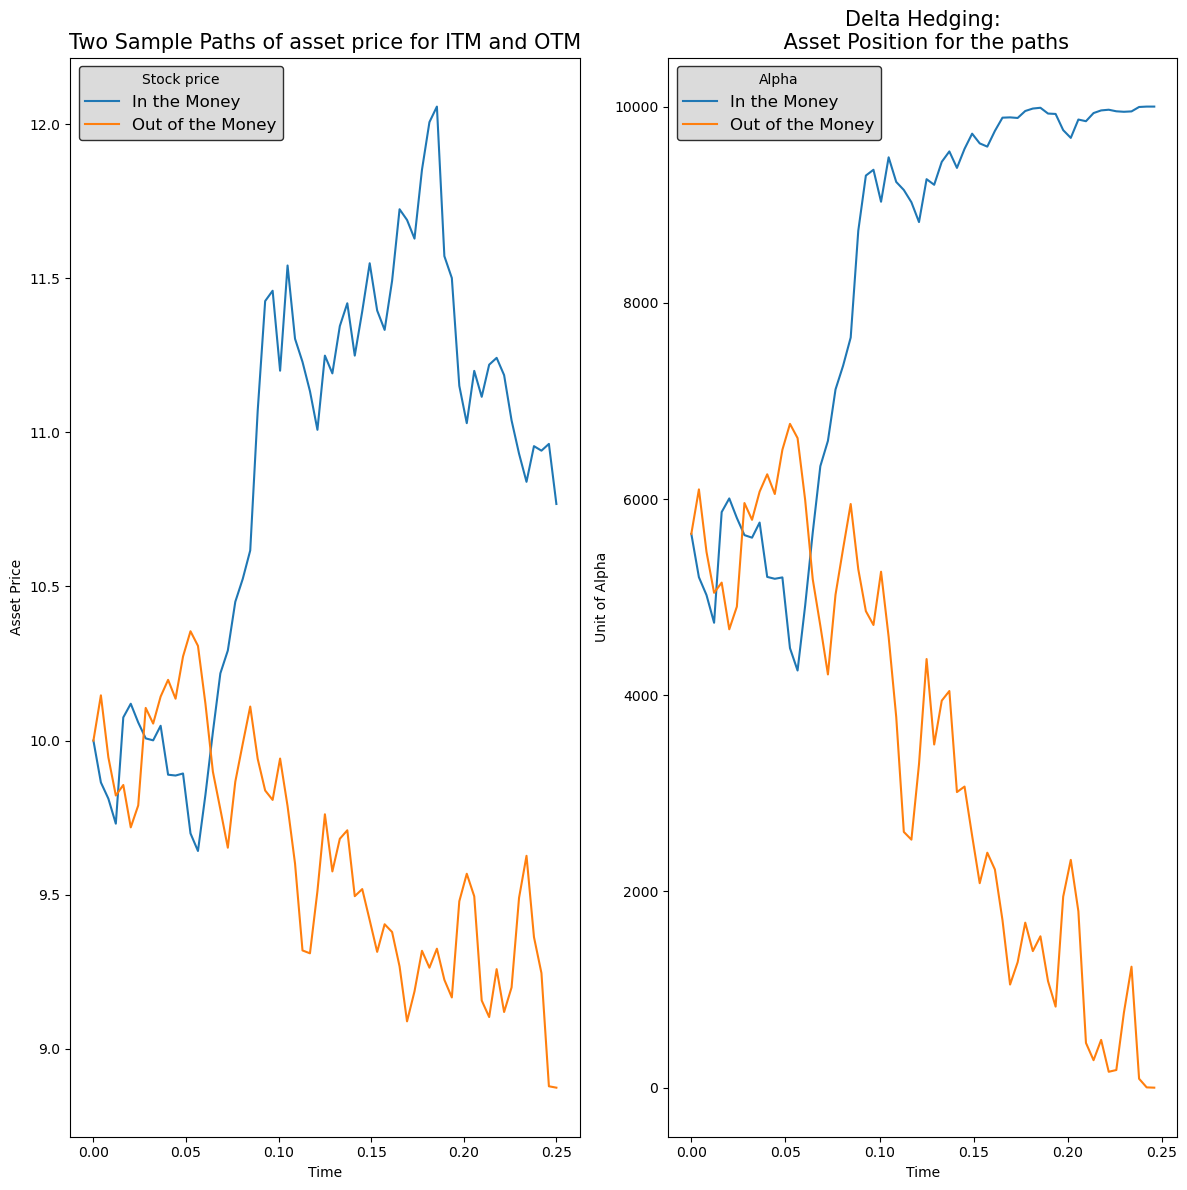

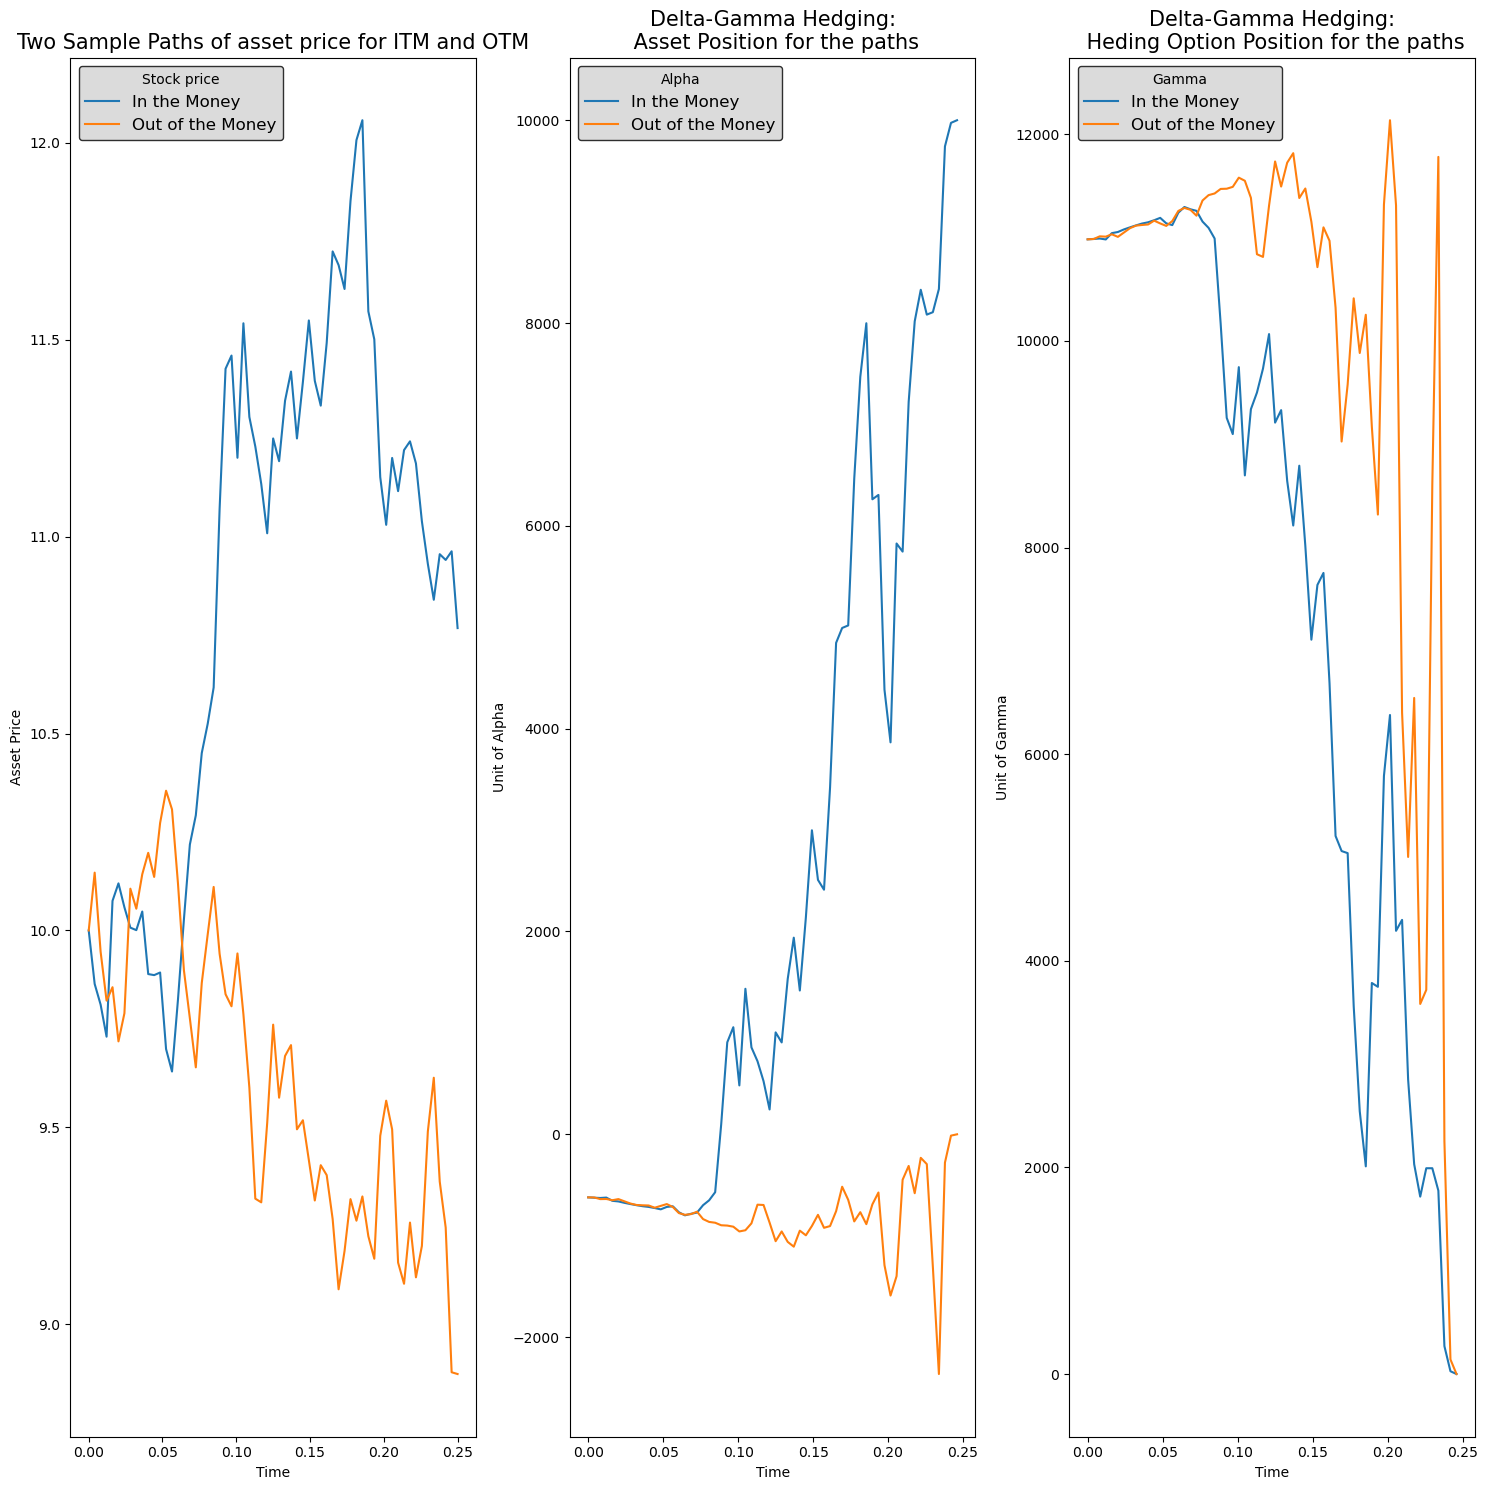

In [4]:
# Question 2

#Alpha Position for Delta Hedge

fig, ax = plt.subplots(1, 2, figsize=(12, 12))

ax[0].plot(model.t, S[1,:].T, label='In the Money')
ax[0].plot(model.t, S[5,:].T, label='Out of the Money')
ax[0].legend(
    loc='upper left',                
    title='Stock price',             
    fontsize='large',                
    edgecolor='black',               
    facecolor='lightgrey',            
    frameon=True,                     
    ncol=1
    )
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Asset Price')
ax[0].set_title('Two Sample Paths of asset price for ITM and OTM',
                fontsize = 15)

ax[1].plot(model.t[:-1], alpha[1,:-1].T, label='In the Money')
ax[1].plot(model.t[:-1], alpha[5,:-1].T, label='Out of the Money')
ax[1].legend(
    loc='upper left',                
    title='Alpha',             
    fontsize='large',                
    edgecolor='black',               
    facecolor='lightgrey',            
    frameon=True,                     
    ncol=1
    )
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Unit of Alpha')
ax[1].set_title('Delta Hedging:\n Asset Position for the paths',
                fontsize = 15)

plt.tight_layout()
plt.show()

# Alpha and Gamma Positions for Delta-Gamma hedge

fig, ax = plt.subplots(1,3,figsize=(15, 15))

ax[0].plot(model_2.t, S[1,:].T, label='In the Money')
ax[0].plot(model_2.t, S[5,:].T, label='Out of the Money')
ax[0].legend(
    loc='upper left',                
    title='Stock price',             
    fontsize='large',                
    edgecolor='black',               
    facecolor='lightgrey',            
    frameon=True,                     
    ncol=1
    )
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Asset Price')
ax[0].set_title('Two Sample Paths of asset price for ITM and OTM',
                fontsize = 15)

ax[1].plot(model_2.t[:-1], alpha_2[1,:-1].T, label='In the Money')
ax[1].plot(model_2.t[:-1], alpha_2[5,:-1].T, label='Out of the Money')
ax[1].legend(
    loc='upper left',                
    title='Alpha',             
    fontsize='large',                
    edgecolor='black',               
    facecolor='lightgrey',            
    frameon=True,                     
    ncol=1
    )
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Unit of Alpha')
ax[1].set_title('Delta-Gamma Hedging:\n Asset Position for the paths',
                fontsize = 15)

ax[2].plot(model_2.t[:-1], gamma_2[1,:-1].T, label='In the Money')
ax[2].plot(model_2.t[:-1], gamma_2[5,:-1].T, label='Out of the Money')
ax[2].legend(
    loc='upper left',                
    title='Gamma',             
    fontsize='large',                
    edgecolor='black',               
    facecolor='lightgrey',            
    frameon=True,                     
    ncol=1
    )
ax[2].set_xlabel('Time')
ax[2].set_ylabel('Unit of Gamma')
ax[2].set_title('Delta-Gamma Hedging:\n Heding Option Position for the paths',
                fontsize = 15)

plt.tight_layout()
plt.show()

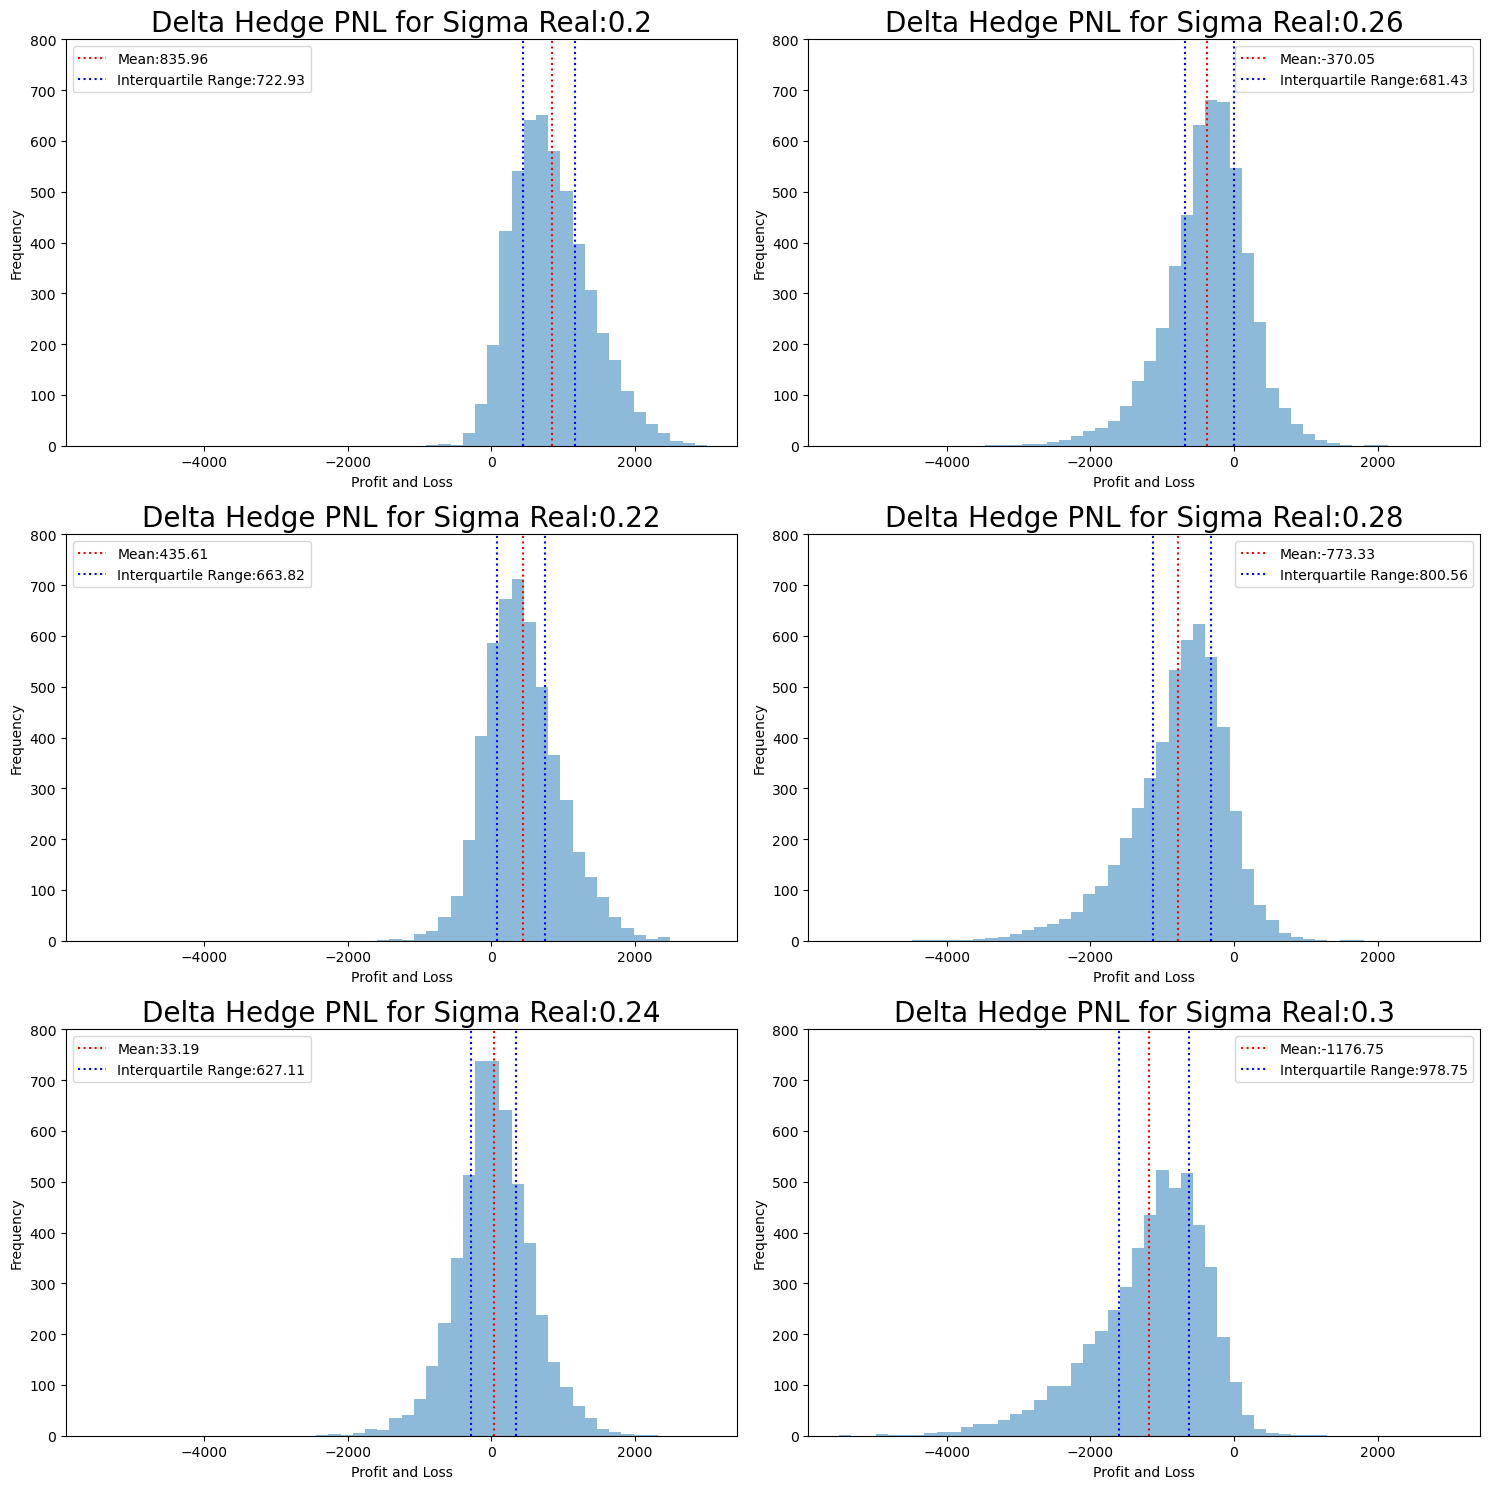

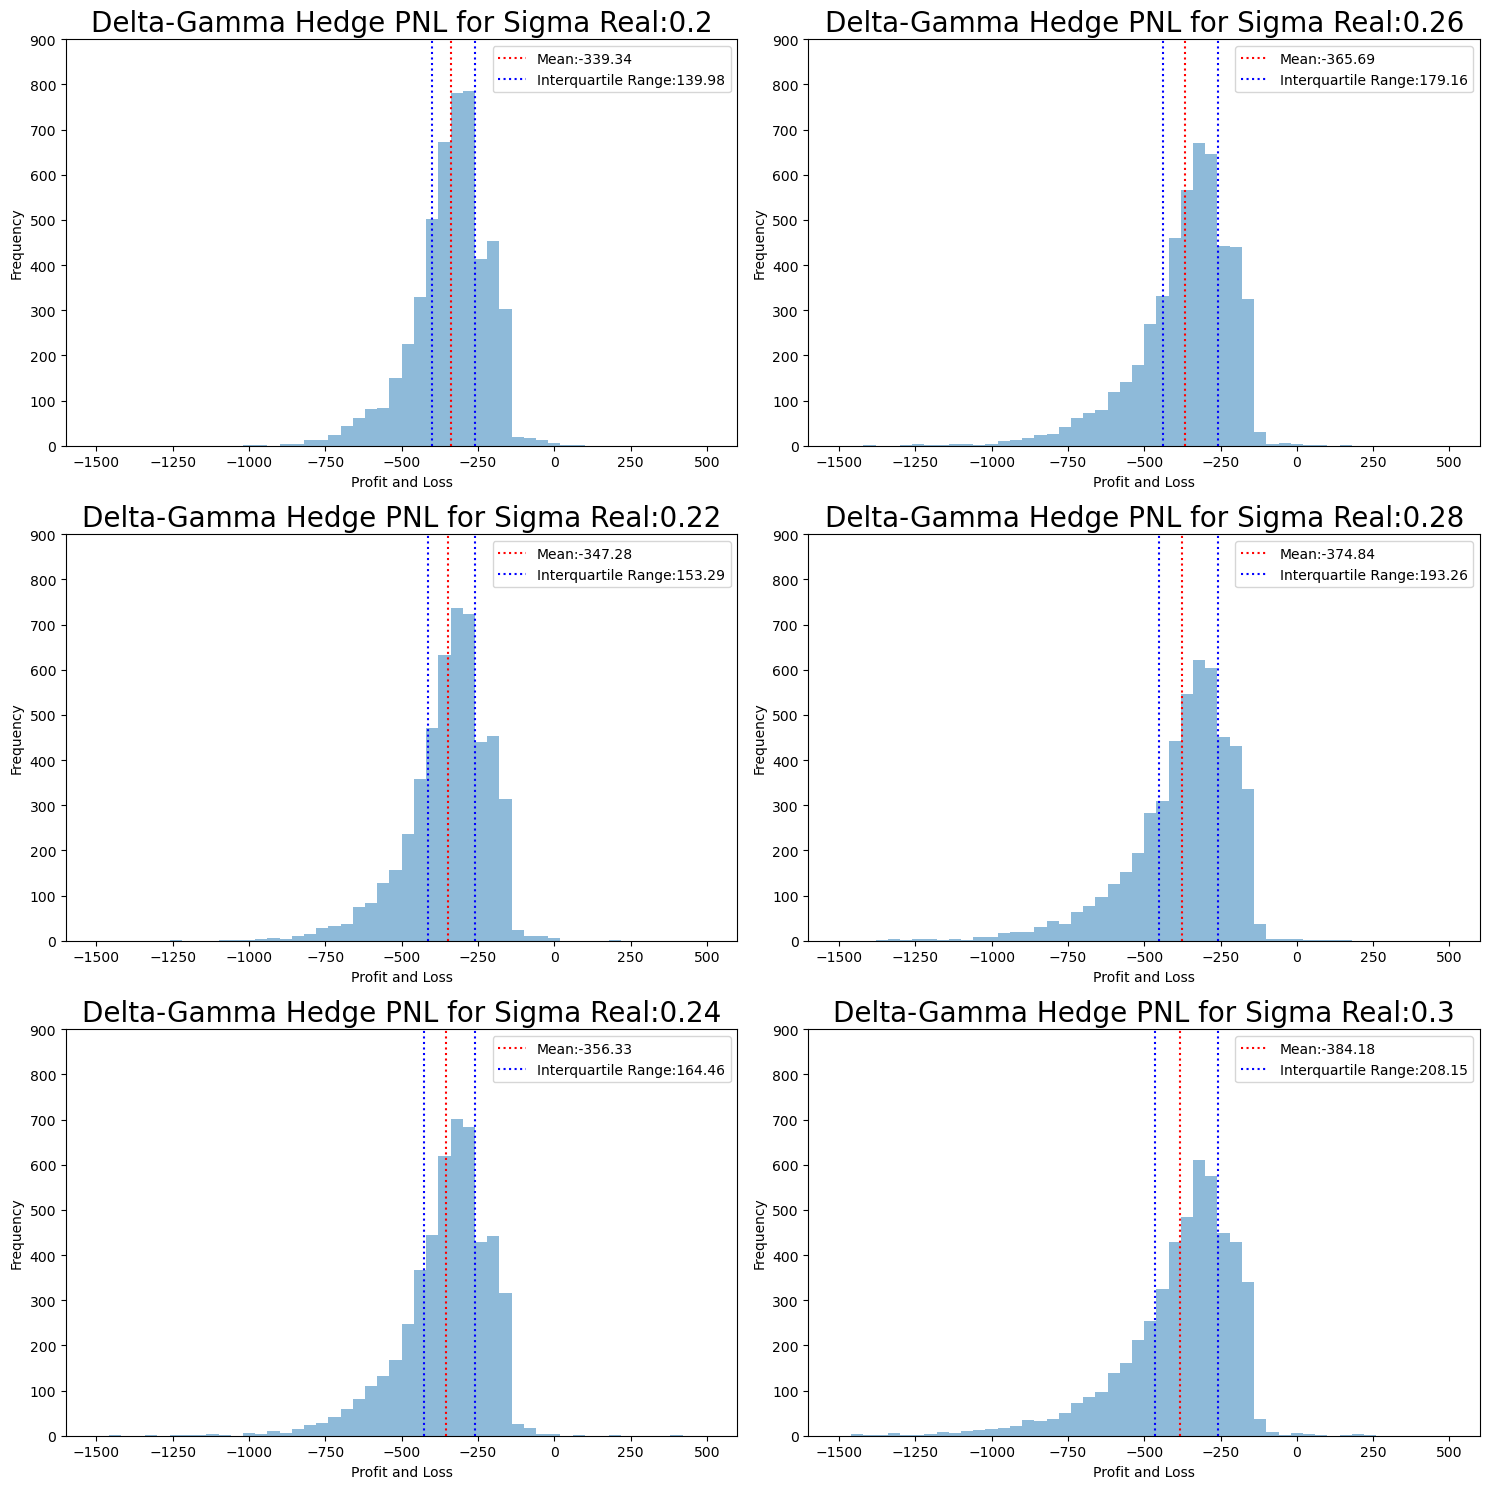

In [5]:
# Question 3

from scipy.stats import iqr 

sigma_real_array = [0.2, 0.22, 0.24, 0.26, 0.28, 0.30]

mean_delta = []
mean_delta_gamma = []
sd_delta = []
sd_delta_gamma = []
PnL_delta = []
PnL_gamma = []

time = []
asset_price = []
alpha_delta =[]
alpha_gamma = []
gamma = []

for sigma_r in sigma_real_array:
        
    model_Q3 = hedge(Tg=0.25, sigma=0.25, Ndt=63, Th=0.3, sigma_real=sigma_r, r=0.05, mu=0.1)
    
    np.random.seed(250)
    t_i, S_i, M_i, alpha_i, gamma_i, opt_h_i, delta_g_i, delta_h_i = model_Q3.simulate_gamma_hedge(batch_size=5_000, units=10000)
    
    np.random.seed(250)
    t_j, S_j, M_j, alpha_j = model_Q3.simulate_delta_hedge(batch_size=5_000, units=10000)
    
    PnL_i = M_i[:,-1]
    PnL_j = M_j[:,-1]
    
    PnL_delta.append(PnL_j)
    PnL_gamma.append(PnL_i)
    
    time.append(t_i)
    asset_price.append(S_i)
    alpha_delta.append(alpha_j)
    alpha_gamma.append(alpha_i)
    gamma.append(gamma_i)
    
#Delta Hedge PnL
    
fig, ax = plt.subplots(3,2,figsize=(15, 15))

for i in range(3):
    ax[i,0].hist(PnL_delta[i],bins=np.linspace(-5500,3000,51), alpha = 0.5)
    ax[i,0].set_title('Delta Hedge PNL for Sigma Real:' + str(sigma_real_array[i]), fontsize = 20)
    ax[i,0].set_xlabel('Profit and Loss')
    ax[i,0].set_ylabel('Frequency')
    ax[i,0].set_ylim(0,800)
    ax[i,0].axvline(PnL_delta[i].mean(), linestyle=":", color="red", label='Mean:' + \
                        str(np.round(PnL_delta[i].mean(), 2)))
    ax[i,0].axvline(np.quantile(PnL_delta[i], 0.25), linestyle=":", color="blue")
    ax[i,0].axvline(np.quantile(PnL_delta[i], 0.75), linestyle=":", color="blue", \
                    label='Interquartile Range:' + str(np.round(iqr(PnL_delta[i]),2)))
    ax[i,0].legend()

for i in range(3):
    ax[i,1].hist(PnL_delta[i+3],bins=np.linspace(-5500,3000,51), alpha = 0.5)
    ax[i,1].set_title('Delta Hedge PNL for Sigma Real:' + str(sigma_real_array[i+3]), fontsize = 20)
    ax[i,1].set_xlabel('Profit and Loss')
    ax[i,1].set_ylabel('Frequency')
    ax[i,1].set_ylim(0,800)
    ax[i,1].axvline(PnL_delta[i+3].mean(), linestyle=":", color="red", label='Mean:' + \
                        str(np.round(PnL_delta[i+3].mean(), 2)))
    ax[i,1].axvline(np.quantile(PnL_delta[i+3], 0.25), linestyle=":", color="blue")
    ax[i,1].axvline(np.quantile(PnL_delta[i+3], 0.75), linestyle=":", color="blue", \
                    label='Interquartile Range:' + str(np.round(iqr(PnL_delta[i+3]),2)))
    ax[i,1].legend()
    

plt.tight_layout()
plt.show()

#Delta-Gamma Hedge PnL
    
fig, ax = plt.subplots(3,2,figsize=(15, 15))

for i in range(3):
    ax[i,0].hist(PnL_gamma[i],bins=np.linspace(-1500,500,51), alpha = 0.5)
    ax[i,0].set_title('Delta-Gamma Hedge PNL for Sigma Real:' + str(sigma_real_array[i]), fontsize = 20)
    ax[i,0].set_xlabel('Profit and Loss')
    ax[i,0].set_ylabel('Frequency')
    ax[i,0].set_ylim(0,900)
    ax[i,0].axvline(PnL_gamma[i].mean(), linestyle=":", color="red", label='Mean:' + \
                        str(np.round(PnL_gamma[i].mean(), 2)))
    ax[i,0].axvline(np.quantile(PnL_gamma[i], 0.25), linestyle=":", color="blue")
    ax[i,0].axvline(np.quantile(PnL_gamma[i], 0.75), linestyle=":", color="blue", \
                    label='Interquartile Range:' + str(np.round(iqr(PnL_gamma[i]),2)))
    ax[i,0].legend()

for i in range(3):
    ax[i,1].hist(PnL_gamma[i+3],bins=np.linspace(-1500,500,51), alpha = 0.5)
    ax[i,1].set_title('Delta-Gamma Hedge PNL for Sigma Real:' + str(sigma_real_array[i+3]), fontsize = 20)
    ax[i,1].set_xlabel('Profit and Loss')
    ax[i,1].set_ylabel('Frequency')
    ax[i,1].set_ylim(0,900)
    ax[i,1].axvline(PnL_gamma[i+3].mean(), linestyle=":", color="red", label='Mean:' + \
                        str(np.round(PnL_gamma[i+3].mean(), 2)))
    ax[i,1].axvline(np.quantile(PnL_gamma[i+3], 0.25), linestyle=":", color="blue")
    ax[i,1].axvline(np.quantile(PnL_gamma[i+3], 0.75), linestyle=":", color="blue", \
                    label='Interquartile Range:' + str(np.round(iqr(PnL_gamma[i+3]),2)))
    ax[i,1].legend()
    

plt.tight_layout()
plt.show()
    

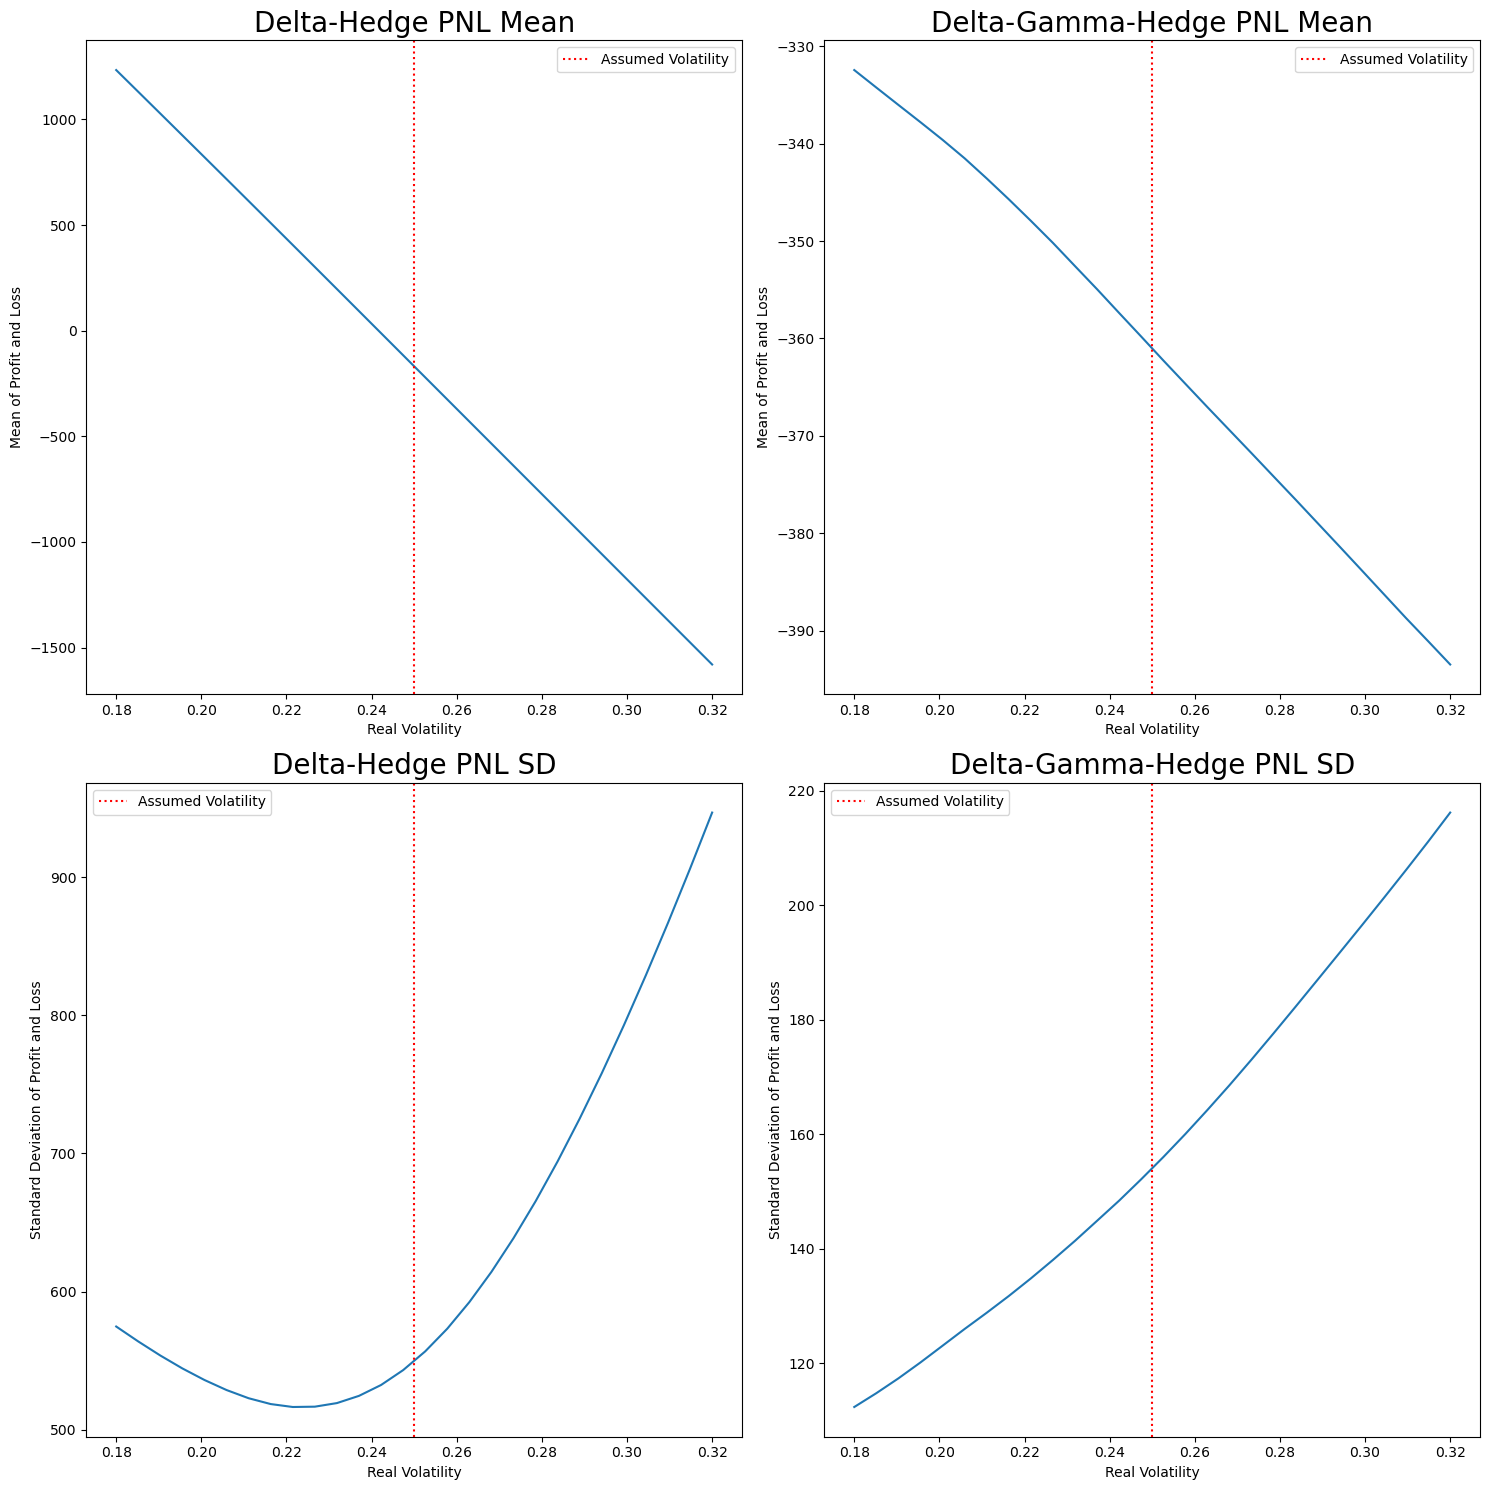

In [6]:
#Plots of Means and Standard Deviations

sigma_real_array_2 = np.linspace(0.18, 0.32, 28)

mean_delta = []
mean_delta_gamma = []
sd_delta = []
sd_delta_gamma = []

for sigma_r in sigma_real_array_2:
    
    model_Q3 = hedge(Tg=0.25, sigma=0.25, Ndt=63, Th=0.3, sigma_real=sigma_r, r=0.05, mu=0.1)
    
    np.random.seed(250)
    t_i, S_i, M_i, alpha_i, gamma_i, opt_h_i, delta_g_i, delta_h_i = model_Q3.simulate_gamma_hedge(batch_size=5_000, units=10000)
    
    np.random.seed(250)
    t_j, S_j, M_j, alpha_j = model_Q3.simulate_delta_hedge(batch_size=5_000, units=10000)
    
    PnL_i = M_i[:,-1]
    PnL_j = M_j[:,-1]
    
    sd_delta_gamma.append(np.var(PnL_i) ** 0.5)
    mean_delta_gamma.append(np.mean(PnL_i))
    sd_delta.append(np.var(PnL_j) ** 0.5)
    mean_delta.append(np.mean(PnL_j))
        
fig, ax = plt.subplots(2,2,figsize=(15, 15))

ax[0,0].plot(sigma_real_array_2, mean_delta)
ax[0,0].set_title('Delta-Hedge PNL Mean', fontsize = 20)
ax[0,0].set_xlabel('Real Volatility')
ax[0,0].set_ylabel('Mean of Profit and Loss')
ax[0,0].axvline(0.25, linestyle=":", color="red", label='Assumed Volatility')
ax[0,0].legend()

ax[0,1].plot(sigma_real_array_2, mean_delta_gamma)
ax[0,1].set_title('Delta-Gamma-Hedge PNL Mean', fontsize = 20)
ax[0,1].set_xlabel('Real Volatility')
ax[0,1].set_ylabel('Mean of Profit and Loss')
ax[0,1].axvline(0.25, linestyle=":", color="red", label='Assumed Volatility')
ax[0,1].legend()

ax[1,0].plot(sigma_real_array_2, sd_delta)
ax[1,0].set_title('Delta-Hedge PNL SD', fontsize = 20)
ax[1,0].set_xlabel('Real Volatility')
ax[1,0].set_ylabel('Standard Deviation of Profit and Loss')
ax[1,0].axvline(0.25, linestyle=":", color="red", label='Assumed Volatility')
ax[1,0].legend()

ax[1,1].plot(sigma_real_array_2, sd_delta_gamma)
ax[1,1].set_title('Delta-Gamma-Hedge PNL SD', fontsize = 20)
ax[1,1].set_xlabel('Real Volatility')
ax[1,1].set_ylabel('Standard Deviation of Profit and Loss')
ax[1,1].axvline(0.25, linestyle=":", color="red", label='Assumed Volatility')
ax[1,1].legend()


plt.legend()
plt.tight_layout()
plt.show()

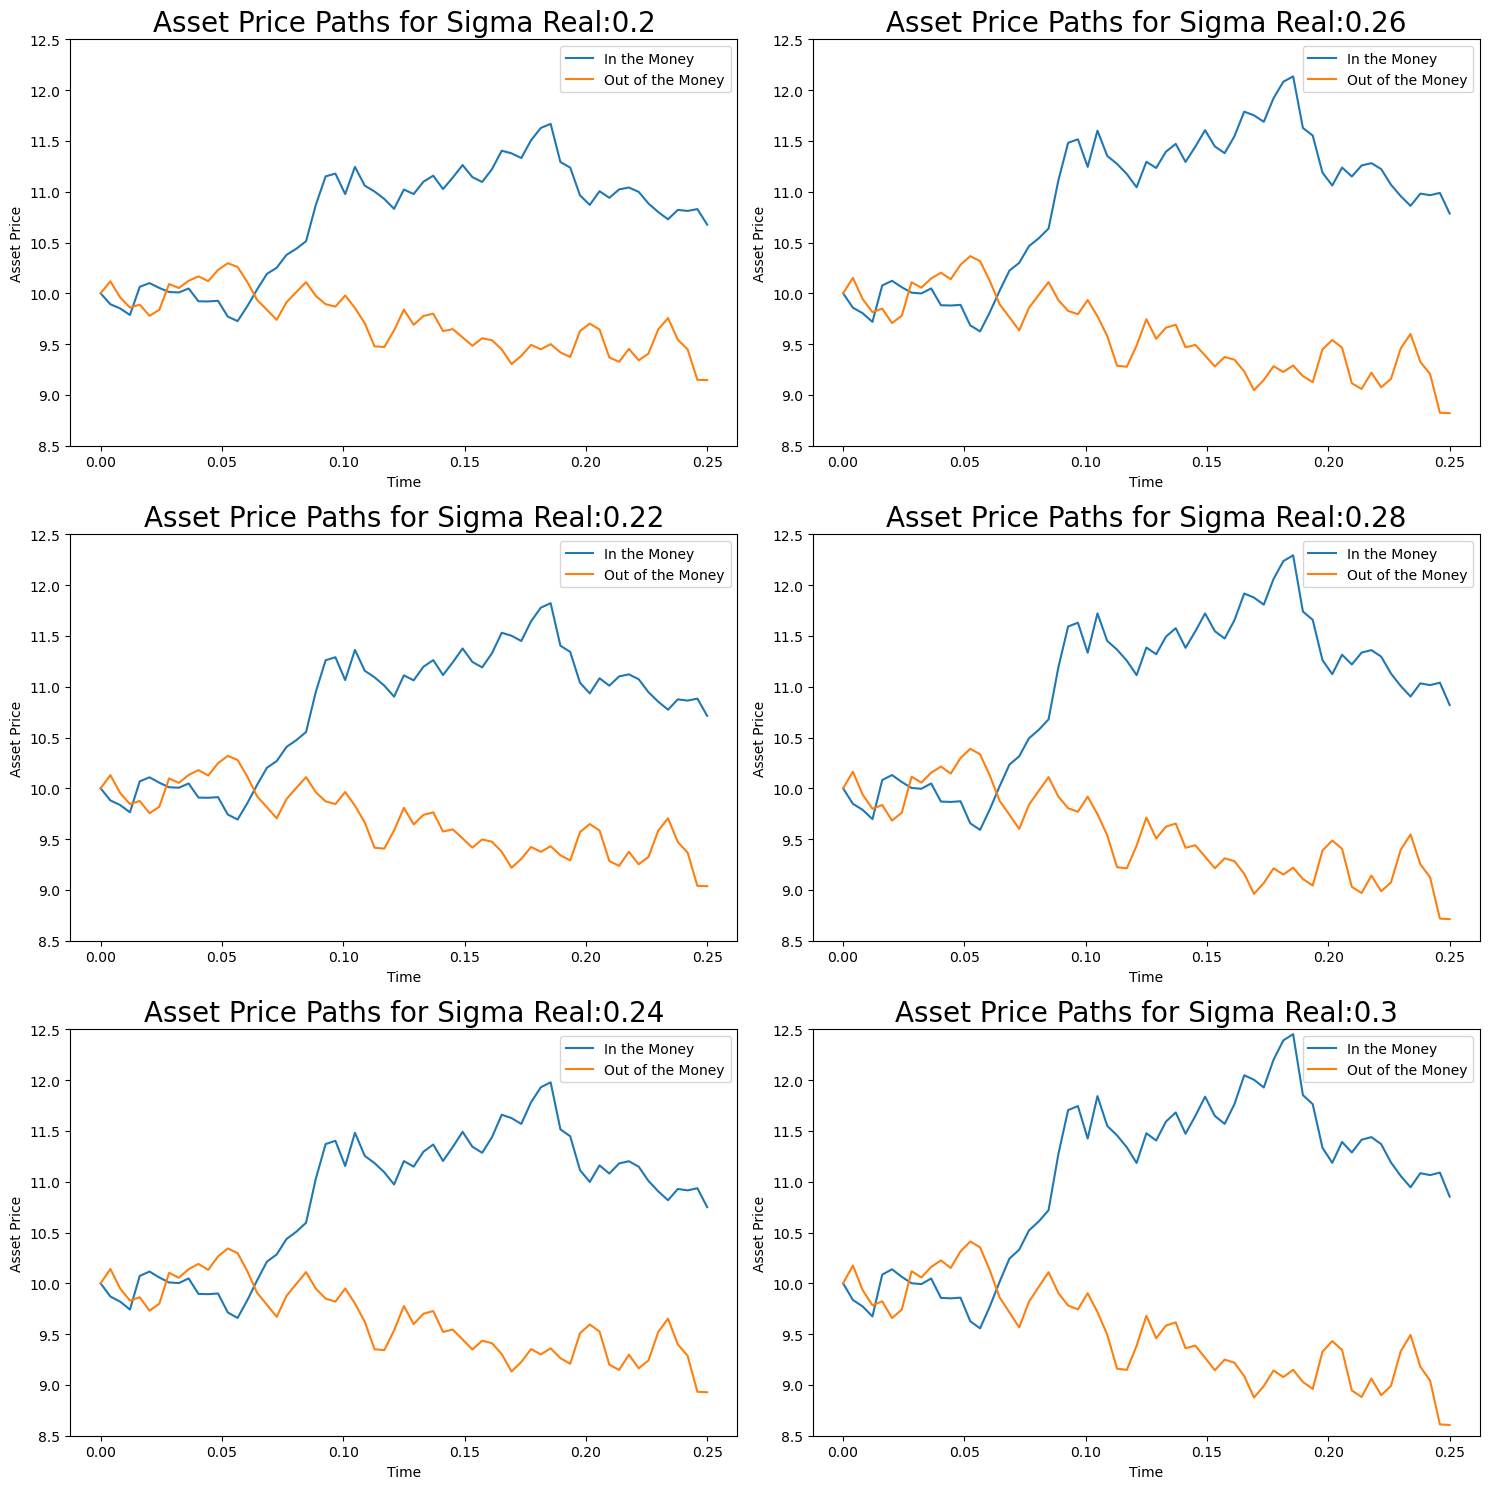

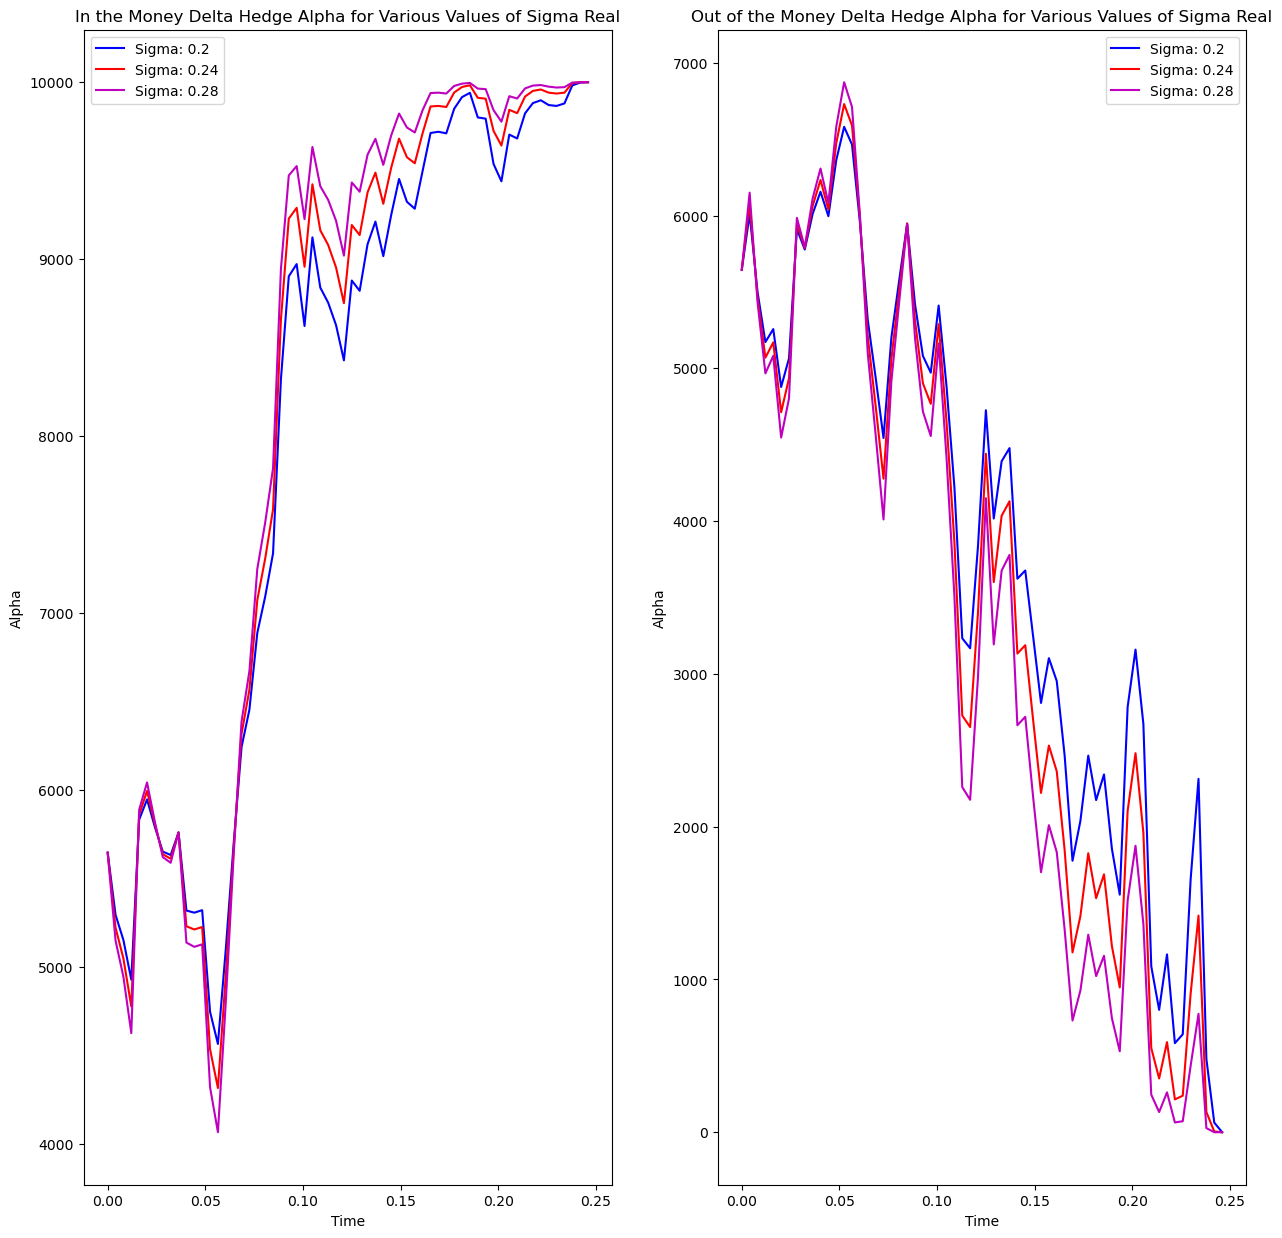

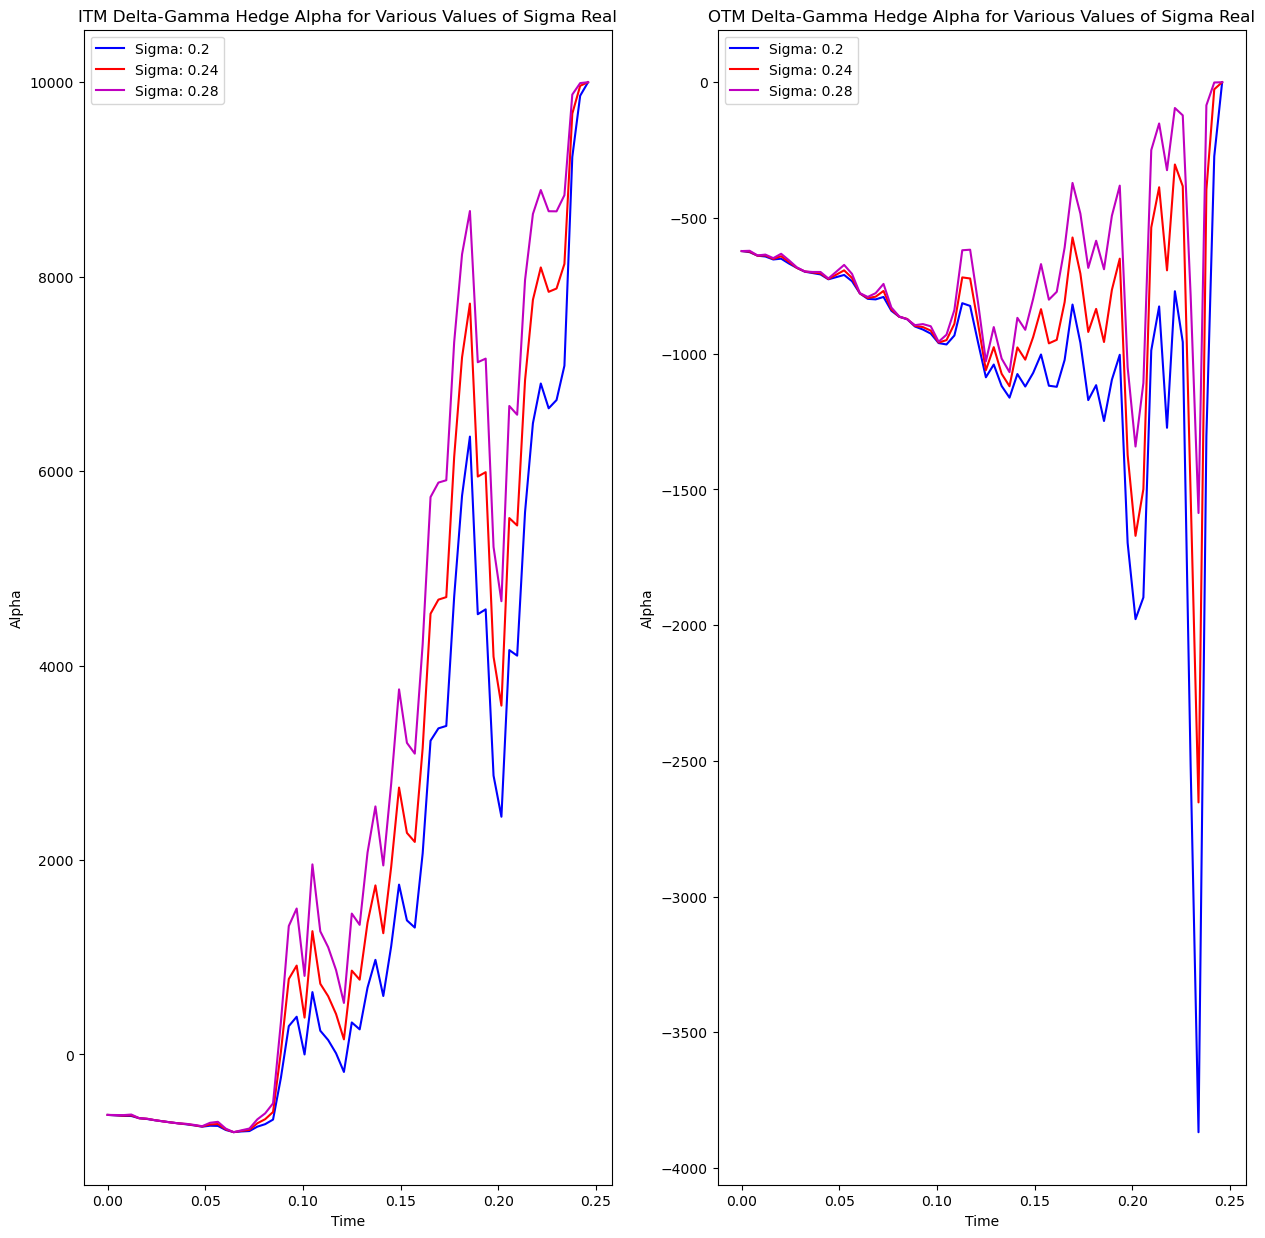

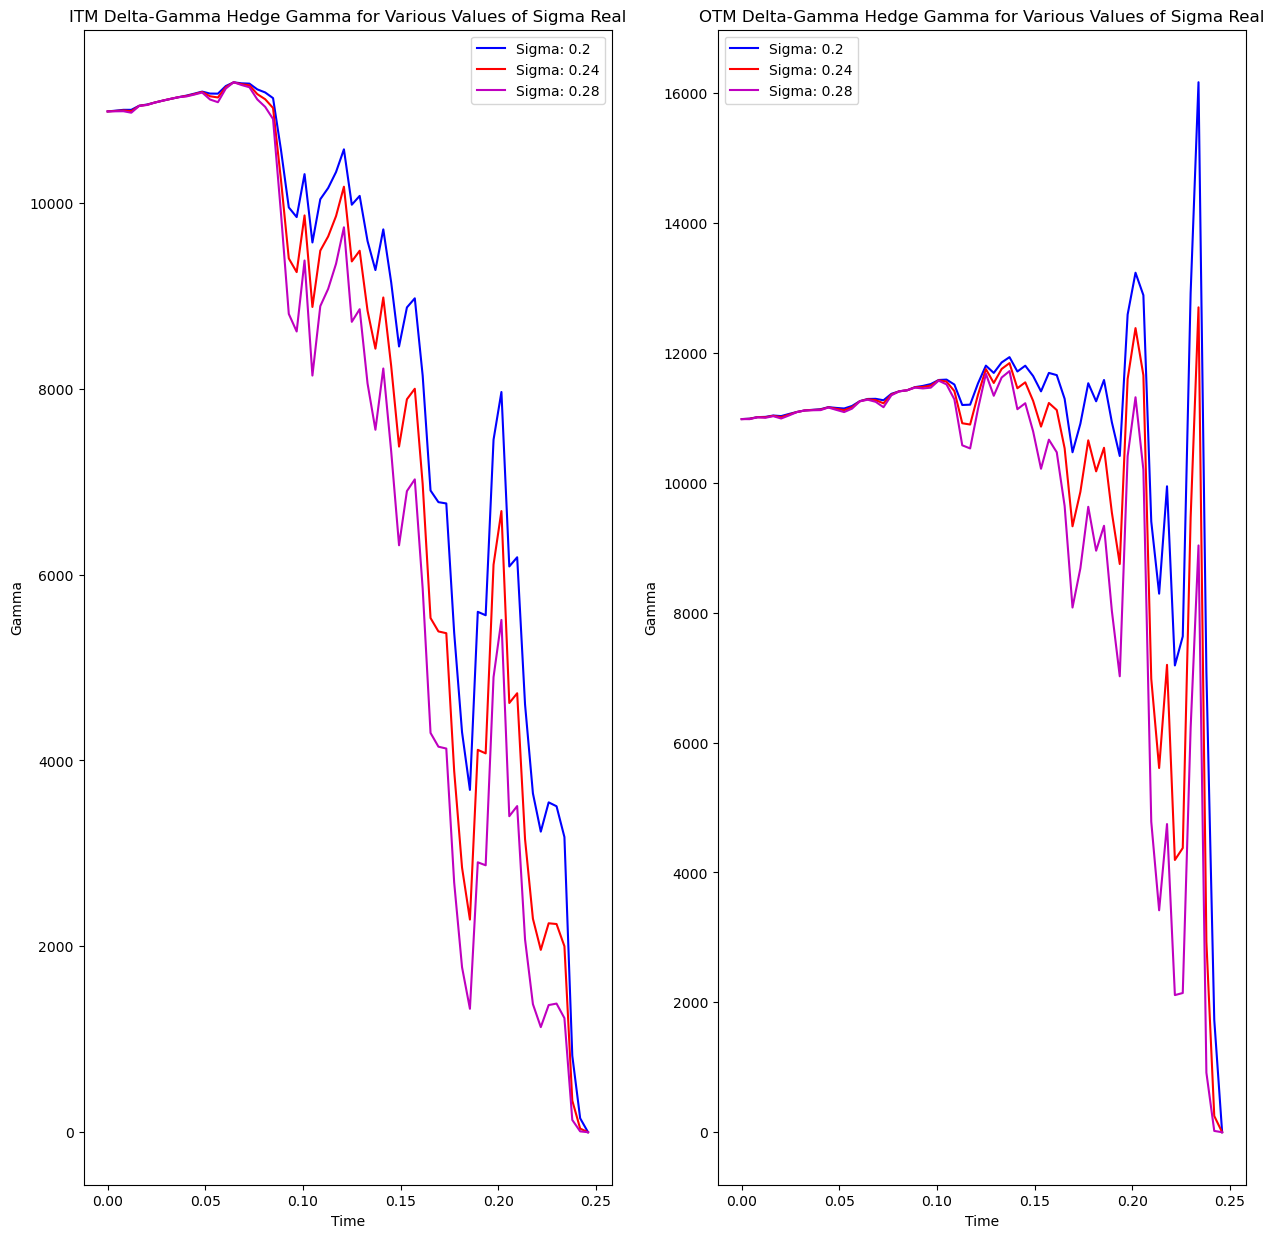

In [7]:
#Effects on Hedging Positions

sigma_real_array = [0.2, 0.22, 0.24, 0.26, 0.28, 0.30]

#Asset Paths

fig, ax = plt.subplots(3,2,figsize=(15, 15))

for i in range(3):
    ax[i,0].plot(time[i], asset_price[i][1], label='In the Money')
    ax[i,0].plot(time[i], asset_price[i][5], label='Out of the Money')
    ax[i,0].set_title('Asset Price Paths for Sigma Real:' + str(sigma_real_array[i]), fontsize = 20)
    ax[i,0].set_xlabel('Time')
    ax[i,0].set_ylabel('Asset Price')
    ax[i,0].set_ylim(8.5,12.5)
    ax[i,0].legend()

for i in range(3):
    ax[i,1].plot(time[i+3], asset_price[i+3][1], label='In the Money')
    ax[i,1].plot(time[i+3], asset_price[i+3][5], label='Out of the Money')
    ax[i,1].set_title('Asset Price Paths for Sigma Real:' + str(sigma_real_array[i+3]), fontsize = 20)
    ax[i,1].set_xlabel('Time')
    ax[i,1].set_ylabel('Asset Price')
    ax[i,1].set_ylim(8.5,12.5)
    ax[i,1].legend()
    
plt.tight_layout()
plt.show()

#Delta Hedge Alpha

col = ['b', 'g', 'r', 'c', 'm', 'y']

fig, ax = plt.subplots(1,2,figsize=(15, 15))

for i in (0,2,4):
    ax[0].plot(time[i][:-1], alpha_delta[i][1,:-1], color = col[i], label= 'Sigma: ' + str(sigma_real_array[i]))
    ax[1].plot(time[i][:-1], alpha_delta[i][5,:-1], color = col[i], label= 'Sigma: ' + str(sigma_real_array[i]))

ax[0].set_title('In the Money Delta Hedge Alpha for Various Values of Sigma Real')
ax[1].set_title('Out of the Money Delta Hedge Alpha for Various Values of Sigma Real')
ax[0].set_xlabel('Time')
ax[1].set_xlabel('Time')
ax[0].set_ylabel('Alpha')
ax[1].set_ylabel('Alpha')
ax[0].legend()
ax[1].legend()

#Gamma Hedge Alpha

col = ['b', 'g', 'r', 'c', 'm', 'y']

fig, ax = plt.subplots(1,2,figsize=(15, 15))

for i in (0,2,4):
    ax[0].plot(time[i][:-1], alpha_gamma[i][1,:-1], color = col[i], label= 'Sigma: ' + str(sigma_real_array[i]))
    ax[1].plot(time[i][:-1], alpha_gamma[i][5,:-1], color = col[i], label= 'Sigma: ' + str(sigma_real_array[i]))

ax[0].set_title('ITM Delta-Gamma Hedge Alpha for Various Values of Sigma Real')
ax[1].set_title('OTM Delta-Gamma Hedge Alpha for Various Values of Sigma Real')
ax[0].set_xlabel('Time')
ax[1].set_xlabel('Time')
ax[0].set_ylabel('Alpha')
ax[1].set_ylabel('Alpha')
ax[0].legend()
ax[1].legend()

#Gamma Hedge Gamma

col = ['b', 'g', 'r', 'c', 'm', 'y']

fig, ax = plt.subplots(1,2,figsize=(15, 15))

for i in (0,2,4):
    ax[0].plot(time[i][:-1], gamma[i][1,:-1], color = col[i], label= 'Sigma: ' + str(sigma_real_array[i]))
    ax[1].plot(time[i][:-1], gamma[i][5,:-1], color = col[i], label= 'Sigma: ' + str(sigma_real_array[i]))

ax[0].set_title('ITM Delta-Gamma Hedge Gamma for Various Values of Sigma Real')
ax[1].set_title('OTM Delta-Gamma Hedge Gamma for Various Values of Sigma Real')
ax[0].set_xlabel('Time')
ax[1].set_xlabel('Time')
ax[0].set_ylabel('Gamma')
ax[1].set_ylabel('Gamma')
ax[0].legend()
ax[1].legend()



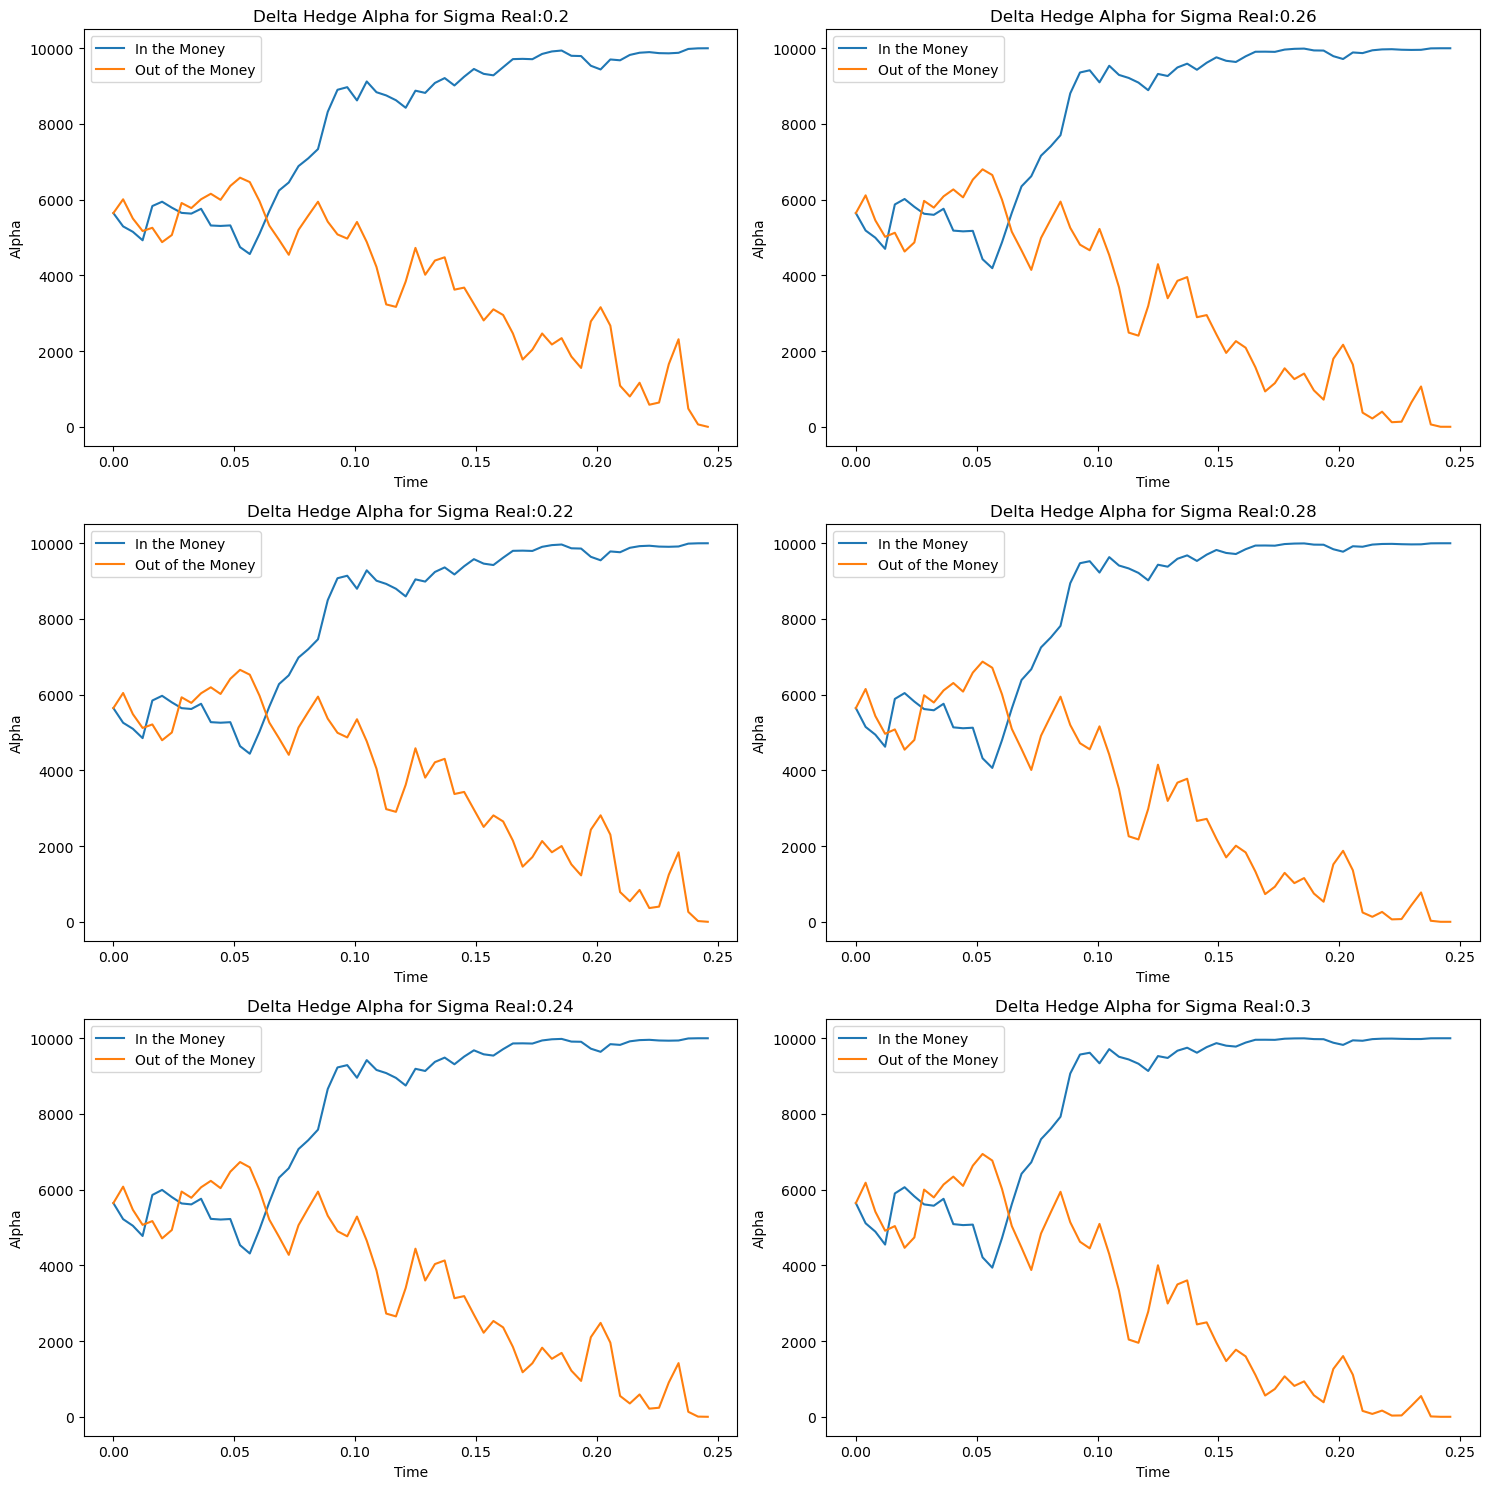

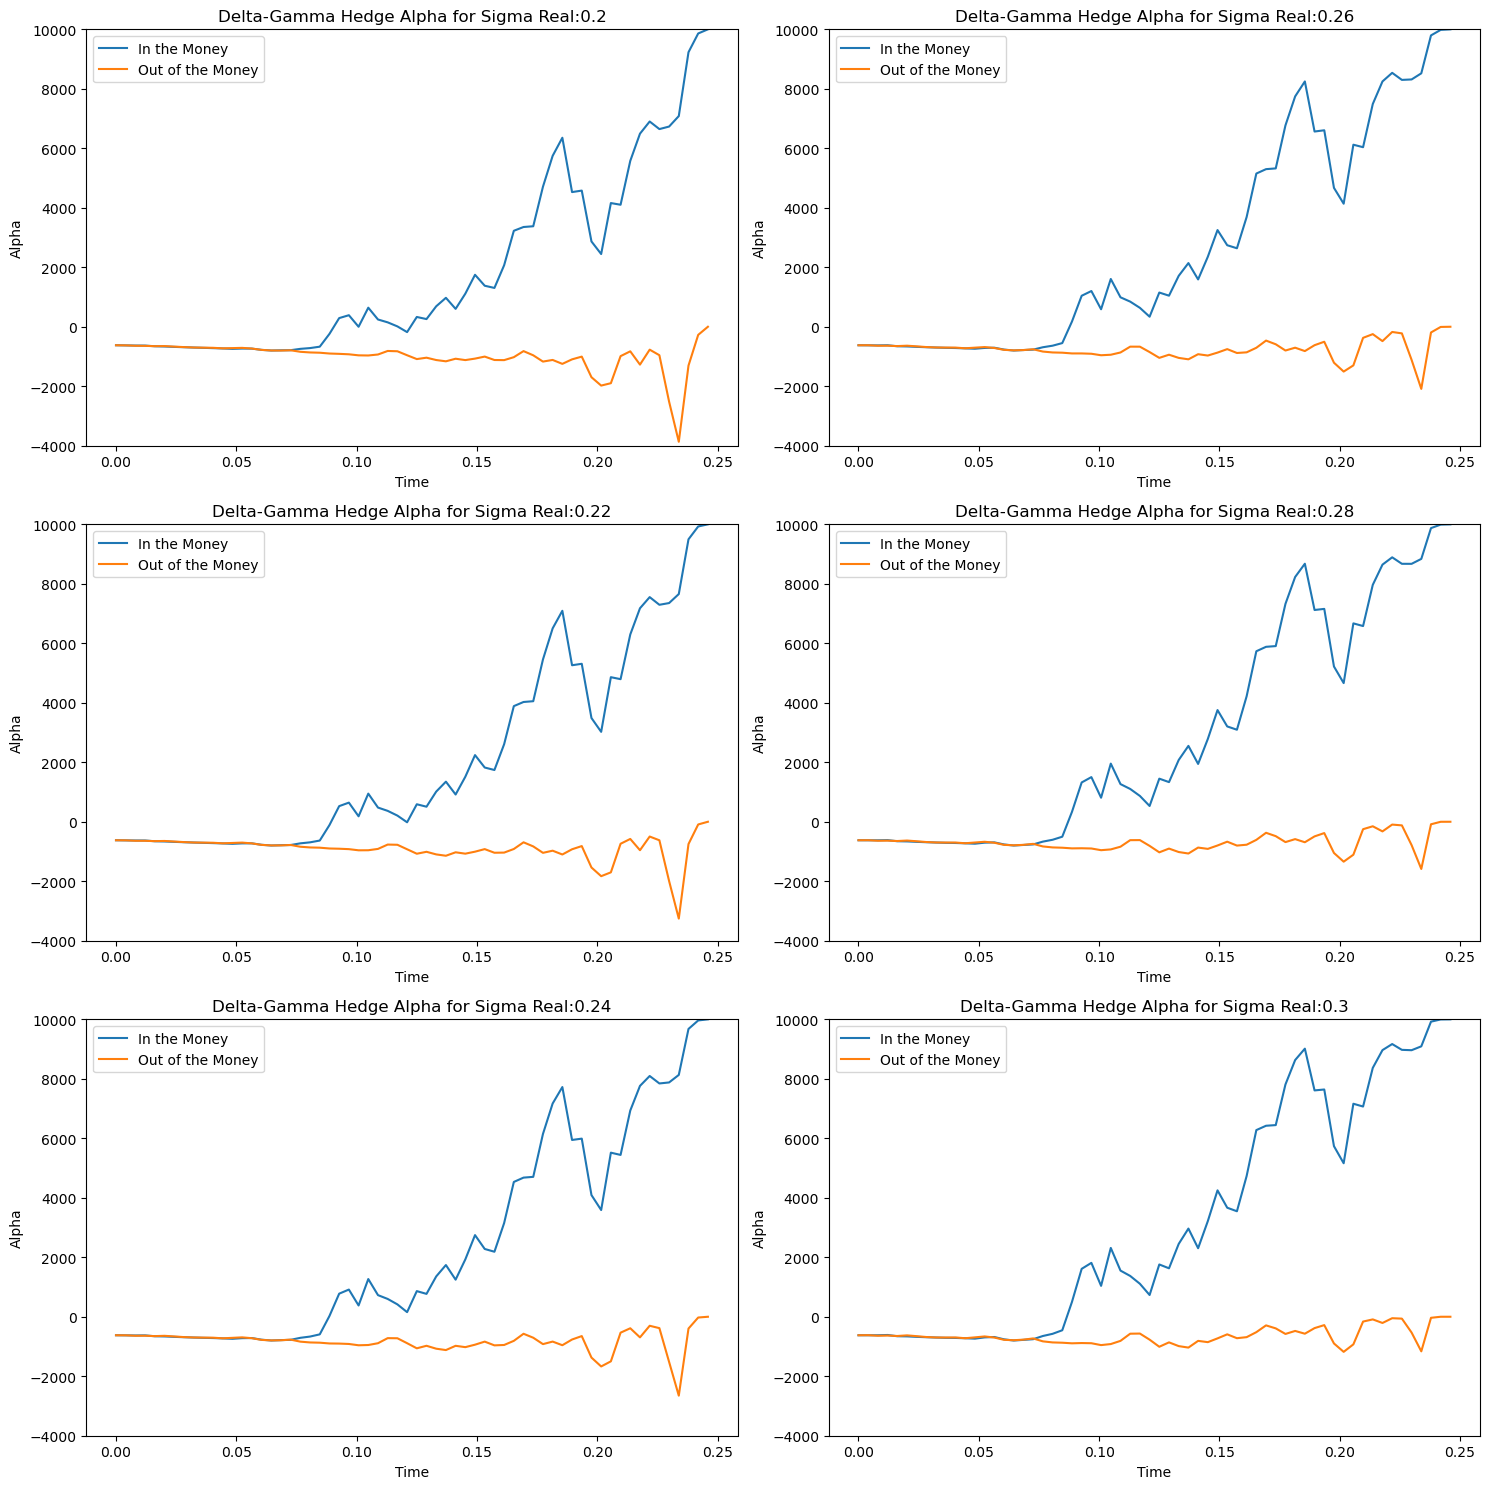

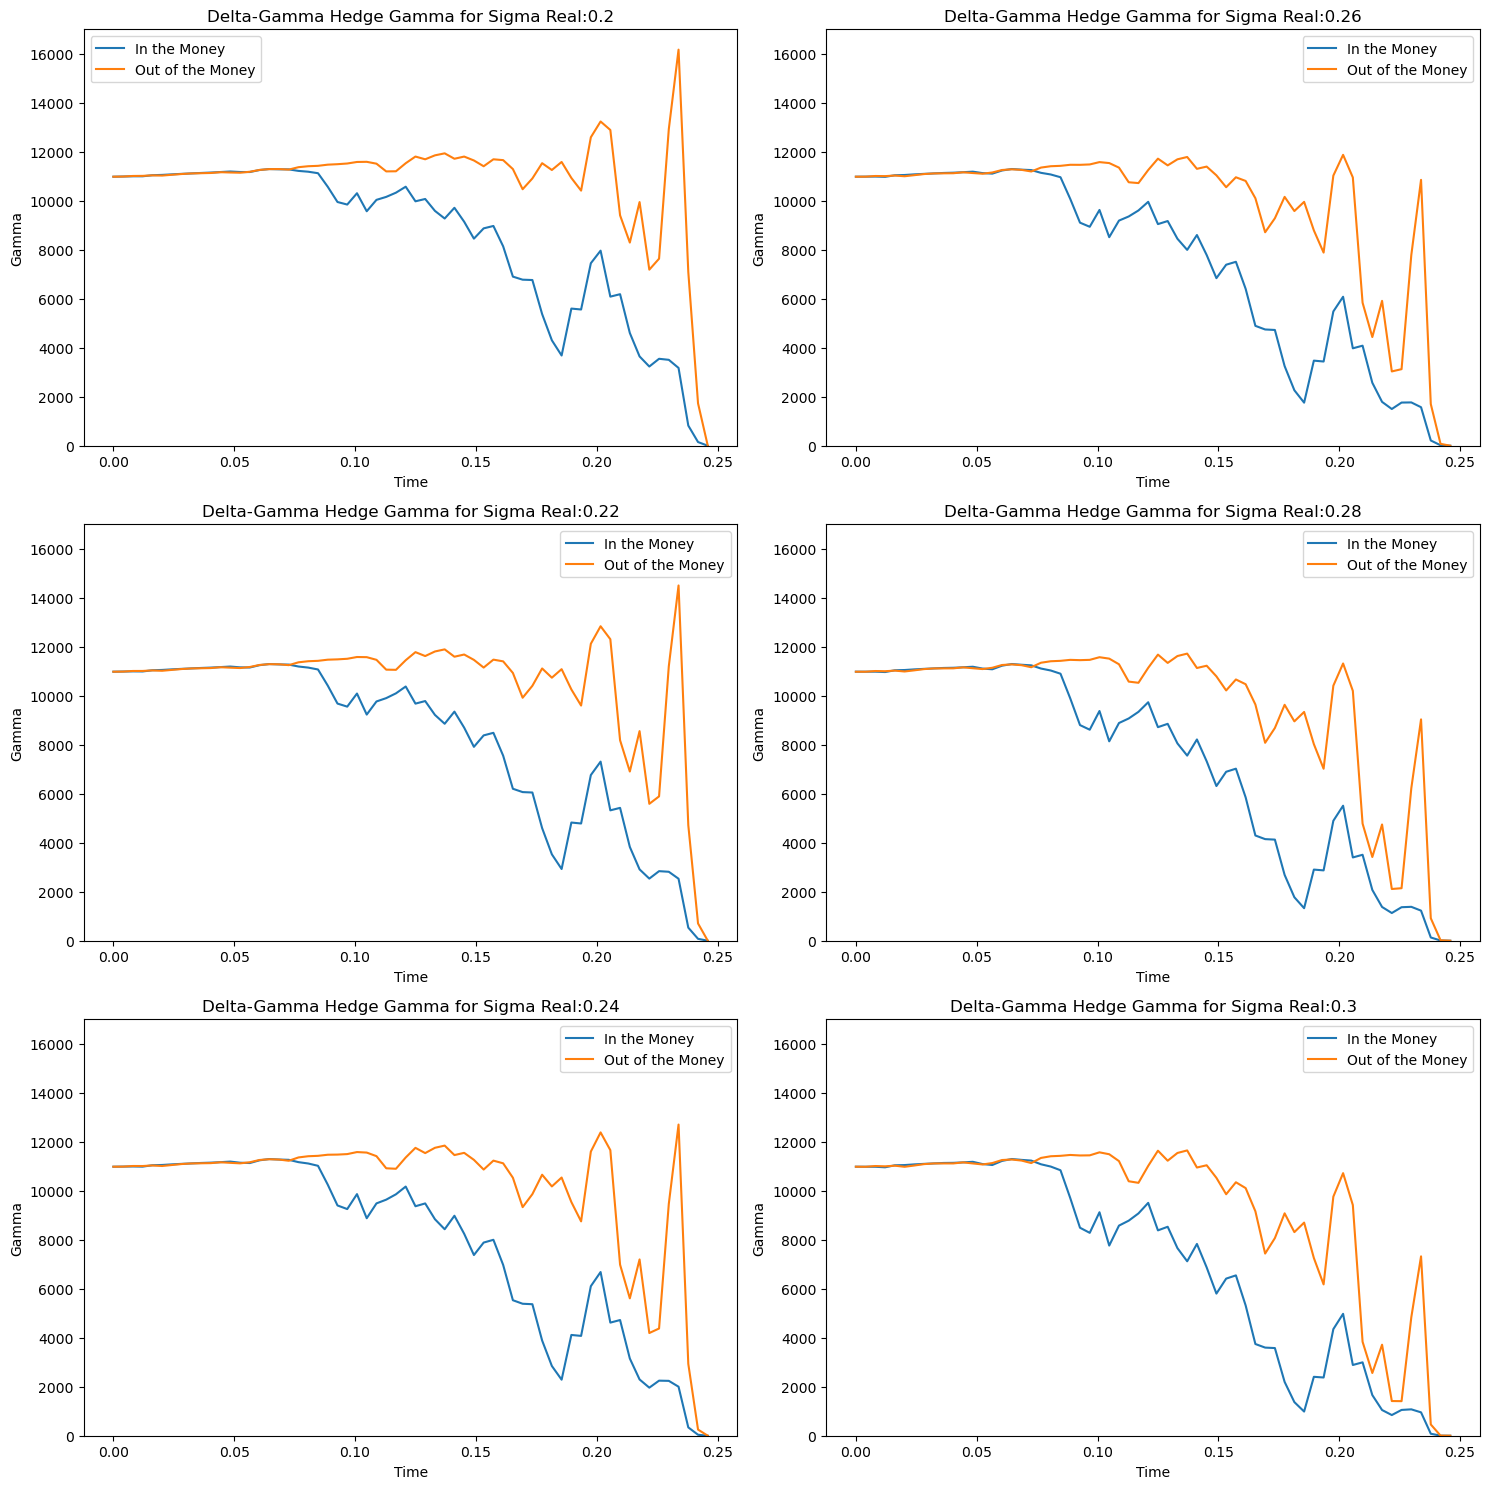

In [8]:
#Extra Plots

#Delta Hedge Alpha

fig, ax = plt.subplots(3,2,figsize=(15, 15))

for i in range(3):
    ax[i,0].plot(time[i][:-1], alpha_delta[i][1,:-1], label='In the Money')
    ax[i,0].plot(time[i][:-1], alpha_delta[i][5,:-1], label='Out of the Money')
    ax[i,0].set_title('Delta Hedge Alpha for Sigma Real:' + str(sigma_real_array[i]))
    ax[i,0].set_xlabel('Time')
    ax[i,0].set_ylabel('Alpha')
    ax[i,0].legend()

for i in range(3):
    ax[i,1].plot(time[i+3][:-1], alpha_delta[i+3][1,:-1], label='In the Money')
    ax[i,1].plot(time[i+3][:-1], alpha_delta[i+3][5,:-1], label='Out of the Money')
    ax[i,1].set_title('Delta Hedge Alpha for Sigma Real:' + str(sigma_real_array[i+3]))
    ax[i,1].set_xlabel('Time')
    ax[i,1].set_ylabel('Alpha')
    ax[i,1].legend()

plt.tight_layout()
plt.show()

#Gamma Hedge Alpha

fig, ax = plt.subplots(3,2,figsize=(15, 15))

for i in range(3):
    ax[i,0].plot(time[i][:-1], alpha_gamma[i][1,:-1], label='In the Money')
    ax[i,0].plot(time[i][:-1], alpha_gamma[i][5,:-1], label='Out of the Money')
    ax[i,0].set_title('Delta-Gamma Hedge Alpha for Sigma Real:' + str(sigma_real_array[i]))
    ax[i,0].set_xlabel('Time')
    ax[i,0].set_ylabel('Alpha')
    ax[i,0].set_ylim(-4000,10000)
    ax[i,0].legend()

for i in range(3):
    ax[i,1].plot(time[i+3][:-1], alpha_gamma[i+3][1,:-1], label='In the Money')
    ax[i,1].plot(time[i+3][:-1], alpha_gamma[i+3][5,:-1], label='Out of the Money')
    ax[i,1].set_title('Delta-Gamma Hedge Alpha for Sigma Real:' + str(sigma_real_array[i+3]))
    ax[i,1].set_xlabel('Time')
    ax[i,1].set_ylabel('Alpha')
    ax[i,1].set_ylim(-4000,10000)
    ax[i,1].legend()

plt.tight_layout()
plt.show()

#Gamma Hedge Gamma

fig, ax = plt.subplots(3,2,figsize=(15, 15))

for i in range(3):
    ax[i,0].plot(time[i][:-1], gamma[i][1,:-1], label='In the Money')
    ax[i,0].plot(time[i][:-1], gamma[i][5,:-1], label='Out of the Money')
    ax[i,0].set_title('Delta-Gamma Hedge Gamma for Sigma Real:' + str(sigma_real_array[i]))
    ax[i,0].set_xlabel('Time')
    ax[i,0].set_ylabel('Gamma')
    ax[i,0].set_ylim(0,17000)
    ax[i,0].legend()

for i in range(3):
    ax[i,1].plot(time[i+3][:-1], gamma[i+3][1,:-1], label='In the Money')
    ax[i,1].plot(time[i+3][:-1], gamma[i+3][5,:-1], label='Out of the Money')
    ax[i,1].set_title('Delta-Gamma Hedge Gamma for Sigma Real:' + str(sigma_real_array[i+3]))
    ax[i,1].set_xlabel('Time')
    ax[i,1].set_ylabel('Gamma')
    ax[i,1].set_ylim(0,17000)
    ax[i,1].legend()

plt.tight_layout()
plt.show()
